In [5]:
import pandas as pd
from pandas import Series, DataFrame
import json 
import os
import requests 
import math
import sqlite3
import copy
import re
import seaborn as sns
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
matplotlib.rcParams.update({'font.size': 15})


In [6]:
#code references for the new data
coderef = pd.read_csv("newbudget1codereferences.csv")
#services provided per planning
planningservice = coderef[coderef["Agency"]== "65 -  PLANNING"].copy()
planningservice

,Organization,Agency,Service,Subservice,Location
513,65101 - PL NEIGH PLAN PRES DESIGN ADMI,65 - PLANNING,651 - NEIGH PLANNING PRES AND DESIGN,6501 - ADMINISTRATION,0000 - UNDEFINED
514,65110 - PL NEIGHBORHOOD PLANNING,65 - PLANNING,651 - NEIGH PLANNING PRES AND DESIGN,6510 - NEIGHBORHOOD PLANNING,0000 - UNDEFINED
515,65111 - PL PRESERVATION PLANNING,65 - PLANNING,651 - NEIGH PLANNING PRES AND DESIGN,6511 - PRESERVATION PLANNING,0000 - UNDEFINED
516,65112 - PL MADISON ARTS PROGRAM,65 - PLANNING,651 - NEIGH PLANNING PRES AND DESIGN,6512 - MADISON ARTS PROGRAM,0000 - UNDEFINED
517,65113 - PL URBAN DESIGN COMMISSION,65 - PLANNING,651 - NEIGH PLANNING PRES AND DESIGN,6513 - URBAN DESIGN COMMISSION,0000 - UNDEFINED
518,65114 - PL SPECIAL PROJECTS,65 - PLANNING,651 - NEIGH PLANNING PRES AND DESIGN,6514 - SPECIAL PROJECTS,0000 - UNDEFINED
519,65115 - PL TIF CDA REDEVELOPMENT PLAN,65 - PLANNING,651 - NEIGH PLANNING PRES AND DESIGN,6515 - TIF CDA REDEVELOPMENT PLANNING,0000 - UNDEFINED
520,65201 - PL COMP PLAN AND DEVELOP ADMIN,65 - PLANNING,652 - COMP PLANNING AND DEV REVIEW,6501 - ADMINISTRATION,0000 - UNDEFINED
521,65220 - PL PLAN COMMISSION DEV REVIEW,65 - PLANNING,652 - COMP PLANNING AND DEV REVIEW,6520 - PLAN COMMISSION DEV REVIEW,0000 - UNDEFINED
522,65221 - PL DEVELP LAND USE ZONING REG,65 - PLANNING,652 - COMP PLANNING AND DEV REVIEW,6521 - DEVELP LAND USE AND ZONING REG,0000 - UNDEFINED


In [7]:
#origional data 
madisonfinancedf = pd.read_csv("budget.csv")
madisonfinancedf

,Agency,Organization,Account Type,Character Code,Object,2015,2016,2017,2018
0,50 - LIBRARY,50100 - LIB PUBLIC SERVICE,Revenue,41 - GENERAL REVENUES,41110 - REAL ESTATE TAXES,-11355535.00,-11941627.00,-12603779.00,-13080447.90
1,50 - LIBRARY,50300 - LIB COL RES & ACCESS,Revenue,41 - GENERAL REVENUES,41110 - REAL ESTATE TAXES,-2056164.00,-2222626.00,-2199357.00,-2268968.77
2,50 - LIBRARY,50400 - LIB FACILITIES,Revenue,41 - GENERAL REVENUES,41110 - REAL ESTATE TAXES,-1766869.00,-1768986.00,-1963404.00,-1976738.18
3,51 - PARKS,51220 - PARK MTC FORESTRY GENERAL,Revenue,49 - TRANSFER IN,49124 - TRANSFER IN FROM OTHER RESTRIC,-1000000.00,-2500000.00,-3100342.25,0.00
4,44 - STREETS,44220 - ST RECYCLING COLLECTION,Revenue,43 - CHARGES FOR SERVICES,43445 - SALE OF RECYCLABLES,-841012.69,-866760.77,-1218608.41,-892803.25
5,65 - PLANNING,65300 - PL METROPOLITAN PLANNING ORG,Revenue,49 - TRANSFER IN,49123 - TRANSFER IN FROM GRANTS,-683795.41,-809850.95,0.00,0.00
6,20 - MUNICIPAL COURT,20100 - MUNICIPAL COURT,Revenue,43 - CHARGES FOR SERVICES,43120 - COURT FEES,-640286.53,-624340.58,-515025.37,-421899.96
7,30 - FIRE,30252 - FIRE INSPECTION ELEVATOR,Revenue,44 - LICENSES AND PERMITS,44230 - ELEVATOR PERMITS AND INSPECTS,-617670.00,-606446.50,-534775.00,-555936.50
8,40 - ENGINEERING,40470 - ENG FAC MAINT ADMIN,Expense,58 - INTER DEPART BILLING,58131 - ID BILLING TO POLICE,-531289.00,-533701.00,-536303.00,-611303.00
9,50 - LIBRARY,50300751 - LIB COL RES & ACCESS CENTRAL,Revenue,43 - CHARGES FOR SERVICES,43568 - CATALOGING SERVICES,-455858.00,-454255.00,-454255.00,-454290.00


In [8]:
#copy of origional data
mfdf = madisonfinancedf.copy()
mfdf = pd.DataFrame(mfdf)
mfdf = mfdf.sort_values('Agency')
mfdf


,Agency,Organization,Account Type,Character Code,Object,2015,2016,2017,2018
8326,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,58 - INTER DEPART BILLING,58180 - ID BILLING TO MONONA TERRACE,NaN,NaN,NaN,0.00
1761,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,52 - BENEFITS,52715 - GRANT,0.00,780.68,0.00,0.00
8332,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,58 - INTER DEPART BILLING,58186 - ID BILLING TO WATER,NaN,NaN,NaN,0.00
6928,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,54 - PURCHASED SERVICES,54645 - CONSULTING SERVICES,68531.03,75298.12,72167.32,83768.30
8331,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,58 - INTER DEPART BILLING,58185 - ID BILLING TO TRANSIT,NaN,NaN,NaN,0.00
8330,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,58 - INTER DEPART BILLING,58184 - ID BILLING TO STORMWATER,NaN,NaN,NaN,0.00
6883,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,54 - PURCHASED SERVICES,54628 - COLLECTION SERVICES,60000.00,40000.00,60000.00,60000.00
8329,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,58 - INTER DEPART BILLING,58183 - ID BILLING TO SEWER,NaN,NaN,NaN,0.00
6866,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,52 - BENEFITS,52412 - LIFE INSURANCE BENEFIT,55866.18,45616.73,42317.13,41289.30
8328,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,58 - INTER DEPART BILLING,58182 - ID BILLING TO PARKING,NaN,NaN,NaN,0.00


In [9]:
#Cleaning up the data
mfdf["Agency"] = mfdf["Agency"].str.replace('[^A-Za-z\s]+', '').str.strip()
mfdf["Organization"]= mfdf["Organization"].str.replace('[^A-Za-z\s]+', '').str.strip()
mfdf["Character Code"]= mfdf["Character Code"].str.replace('[^A-Za-z\s]+', '').str.strip()
mfdf["Object"]=mfdf["Object"].str.replace('[^A-Za-z\s]+', '').str.strip()
mfdf

,Agency,Organization,Account Type,Character Code,Object,2015,2016,2017,2018
8326,UNDEFINED,GENERAL FUND EXPENSE,Expense,INTER DEPART BILLING,ID BILLING TO MONONA TERRACE,NaN,NaN,NaN,0.00
1761,UNDEFINED,GENERAL FUND EXPENSE,Expense,BENEFITS,GRANT,0.00,780.68,0.00,0.00
8332,UNDEFINED,GENERAL FUND EXPENSE,Expense,INTER DEPART BILLING,ID BILLING TO WATER,NaN,NaN,NaN,0.00
6928,UNDEFINED,GENERAL FUND EXPENSE,Expense,PURCHASED SERVICES,CONSULTING SERVICES,68531.03,75298.12,72167.32,83768.30
8331,UNDEFINED,GENERAL FUND EXPENSE,Expense,INTER DEPART BILLING,ID BILLING TO TRANSIT,NaN,NaN,NaN,0.00
8330,UNDEFINED,GENERAL FUND EXPENSE,Expense,INTER DEPART BILLING,ID BILLING TO STORMWATER,NaN,NaN,NaN,0.00
6883,UNDEFINED,GENERAL FUND EXPENSE,Expense,PURCHASED SERVICES,COLLECTION SERVICES,60000.00,40000.00,60000.00,60000.00
8329,UNDEFINED,GENERAL FUND EXPENSE,Expense,INTER DEPART BILLING,ID BILLING TO SEWER,NaN,NaN,NaN,0.00
6866,UNDEFINED,GENERAL FUND EXPENSE,Expense,BENEFITS,LIFE INSURANCE BENEFIT,55866.18,45616.73,42317.13,41289.30
8328,UNDEFINED,GENERAL FUND EXPENSE,Expense,INTER DEPART BILLING,ID BILLING TO PARKING,NaN,NaN,NaN,0.00


In [10]:
#data frame for planning yearly budget by charactercodes 
agency = mfdf[mfdf['Agency']=="PLANNING"]
agency1 = mfdf[mfdf['Agency']=="COMMUNITY DEVELOPMENT"]
agencydic= {"2015": {}, "2016": {} , "2017": {} , "2018": {} }
for year in agencydic:
    for code in agency["Organization"]:
        if code not in agencydic[year]:
            a = agency[agency["Organization"]==code]
            summ = a[year].sum()
            agencydic[year][code] = copy.deepcopy(summ)
adf = pd.DataFrame(agencydic["2015"], index=["2015"])
bdf = pd.DataFrame(agencydic["2016"], index=["2016"])
cdf = pd.DataFrame(agencydic["2017"], index=["2017"])
ddf = pd.DataFrame(agencydic["2018"], index=["2018"])
planyearorg = pd.concat([adf, bdf, cdf, ddf])
planyearorg=planyearorg/1000000

planyearorg


,PL METROPOLITAN PLANNING ORG,PL NEIGH PLAN PRES DESIGN ADMI,PL COMP NEIGH SPEC AREA PLAN,PL NEIGHBORHOOD PLANNING,PL TRANSPORTATION PLAN NON MPO,PL COMP PLAN AND DEVELOP ADMIN,PL PRESERVATION PLANNING,PL SPECIAL PROJECTS,PL RESEARCH INFORMATION SERVIC,PL PLAN COMMISSION DEV REVIEW,PL GEO GIS ADMINISTRATION MAIN,PL URBAN DESIGN COMMISSION,PL MADISON ARTS PROGRAM,PL TIF CDA REDEVELOPMENT PLAN,PL DEVELP LAND USE ZONING REG,PL LAND USE POLICY INTERGOV PL
2015,0.283503,0.297465,0.219246,0.252465,0.134689,0.340130,0.109043,0.212096,0.225441,0.296121,0.106075,0.111734,1.942465,0.000000,0.0,0.0
2016,0.258890,0.335264,0.365725,0.281964,0.203631,0.418839,0.108182,0.301593,0.191919,0.236606,0.048955,0.110497,0.182965,0.000000,0.0,0.0
2017,0.140959,0.377865,0.480060,0.360768,0.221787,0.603246,0.117936,0.100695,0.162118,0.196876,0.087631,0.005203,0.218855,0.000025,0.0,0.0
2018,0.094496,0.421926,0.420081,0.377337,0.365577,0.568047,0.078490,0.127823,0.109070,0.298799,0.102560,0.000000,0.202924,0.000000,0.0,0.0


In [11]:
a=planyearorg.transpose()
a.reset_index(level=0, inplace=True)
a["index"]

0       PL METROPOLITAN PLANNING ORG
1     PL NEIGH PLAN PRES DESIGN ADMI
2       PL COMP NEIGH SPEC AREA PLAN
3           PL NEIGHBORHOOD PLANNING
4     PL TRANSPORTATION PLAN NON MPO
5     PL COMP PLAN AND DEVELOP ADMIN
6           PL PRESERVATION PLANNING
7                PL SPECIAL PROJECTS
8     PL RESEARCH INFORMATION SERVIC
9      PL PLAN COMMISSION DEV REVIEW
10    PL GEO GIS ADMINISTRATION MAIN
11        PL URBAN DESIGN COMMISSION
12           PL MADISON ARTS PROGRAM
13     PL TIF CDA REDEVELOPMENT PLAN
14     PL DEVELP LAND USE ZONING REG
15    PL LAND USE POLICY INTERGOV PL
Name: index, dtype: object

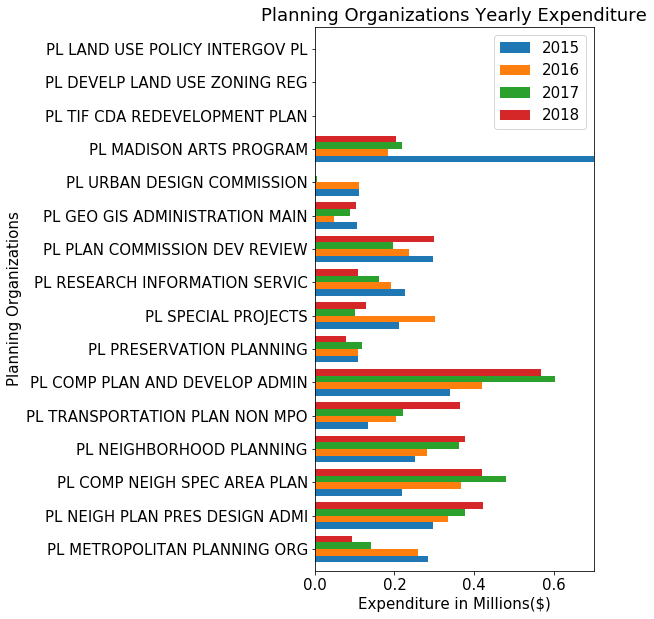

In [12]:
#planning organizations by yearly expenditure horizontal bar 
data=planyearorg.T.plot.barh(figsize=(5,10),title="Planning Organizations Yearly Expenditure", width=0.8) 
data.set_ylabel("Planning Organizations")
data.set_xlabel("Expenditure in Millions($)")
data.set_xlim(0,0.7)
data.legend(loc='upper right')

In [13]:
a=planyearorg["PL MADISON ARTS PROGRAM"]
b=planyearorg["PL COMP PLAN AND DEVELOP ADMIN"]
pd.DataFrame(a)

,PL MADISON ARTS PROGRAM
2015,1.942465
2016,0.182965
2017,0.218855
2018,0.202924


In [14]:
pd.DataFrame(b)

,PL COMP PLAN AND DEVELOP ADMIN
2015,0.340130
2016,0.418839
2017,0.603246
2018,0.568047


AttributeError: 'AxesSubplot' object has no attribute 'autofmt_xdate'

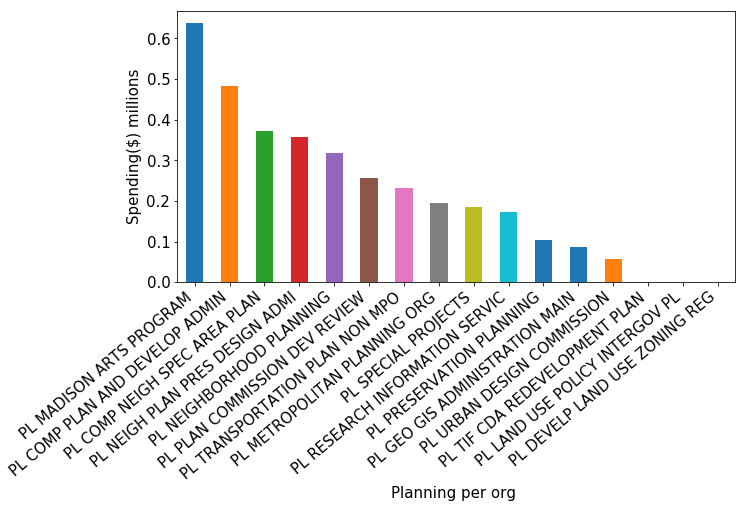

In [15]:
#MEAN bar plot for planning yearly budget by Organization
plot2 = planyearorg.mean().sort_values(ascending=False).T.plot.bar(figsize=(10,5),rot=0) 
plot2.set_ylabel("Spending($) millions")
plot2.set_xlabel("Planning per org ")
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=40, ha="right")
plot2.autofmt_xdate()
#plot2.legend("PL METROPOLITAN PLANNING ORG","PL NEIGH PLAN PRES DESIGN ADMI","PL COMP NEIGH SPEC AREA PLAN","PL NEIGHBORHOOD PLANNING",
#             "PL TRANSPORTATION PLAN NON MPO","PL COMP PLAN AND DEVELOP ADMIN", "PL PRESERVATION PLANNING","PL SPECIAL PROJECTS",
#             "PL RESEARCH INFORMATION SERVIC","PL PLAN COMMISSION DEV REVIEW","PL GEO GIS ADMINISTRATION MAIN","PL URBAN DESIGN COMMISSION"
#             , "PL MADISON ARTS PROGRAM","PL TIF CDA REDEVELOPMENT PLAN","PL DEVELP LAND USE ZONING REG","PL LAND USE POLICY INTERGOV PL")
print(plot2)


AxesSubplot(0.125,0.125;0.775x0.755)


NameError: name 'new' is not defined

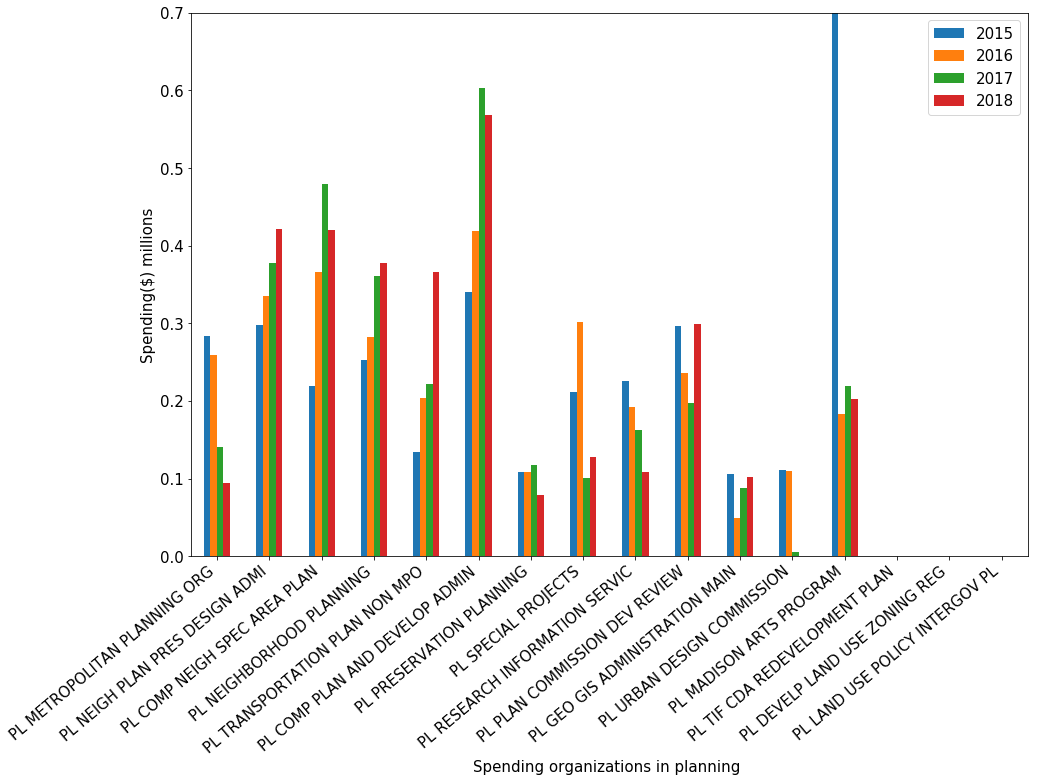

In [16]:
neww = pd.concat([adf,bdf, cdf, ddf])
neww=neww/1000000

plot8 = neww.T.plot.bar(figsize=(15,10), ylim=(0,0.7))
plot8.set_ylabel("Spending($) millions")
plot8.set_xlabel("Spending organizations in planning ")
plot8.set_xticklabels(plot8.get_xticklabels(), rotation=40, ha="right")
print(plot8)
pd.DataFrame(new["PL MADISON ARTS PROGRAM"])

In [ ]:
#MEAN bar plot for planning yearly budget by Organization top 5
plot3 = planyearorg.mean().sort_values(ascending=False).head(6).T.plot.bar(figsize=(10,5))
plot3.set_ylabel("Spending($) millions")
plot3.set_xlabel("Planning per org ")
plot3.set_xticklabels(plot3.get_xticklabels(), rotation=45, ha="right")
print(plot3)

[Text(0,0,'PL COMP PLAN AND DEVELOP ADMIN'),
 Text(0,0,'PL COMP NEIGH SPEC AREA PLAN'),
 Text(0,0,'PL NEIGH PLAN PRES DESIGN ADMI'),
 Text(0,0,'PL NEIGHBORHOOD PLANNING'),
 Text(0,0,'PL PLAN COMMISSION DEV REVIEW'),
 Text(0,0,'PL TRANSPORTATION PLAN NON MPO'),
 Text(0,0,'PL METROPOLITAN PLANNING ORG'),
 Text(0,0,'PL SPECIAL PROJECTS'),
 Text(0,0,'PL RESEARCH INFORMATION SERVIC'),
 Text(0,0,'PL PRESERVATION PLANNING'),
 Text(0,0,'PL GEO GIS ADMINISTRATION MAIN'),
 Text(0,0,'PL URBAN DESIGN COMMISSION'),
 Text(0,0,'PL TIF CDA REDEVELOPMENT PLAN'),
 Text(0,0,'PL LAND USE POLICY INTERGOV PL'),
 Text(0,0,'PL DEVELP LAND USE ZONING REG')]

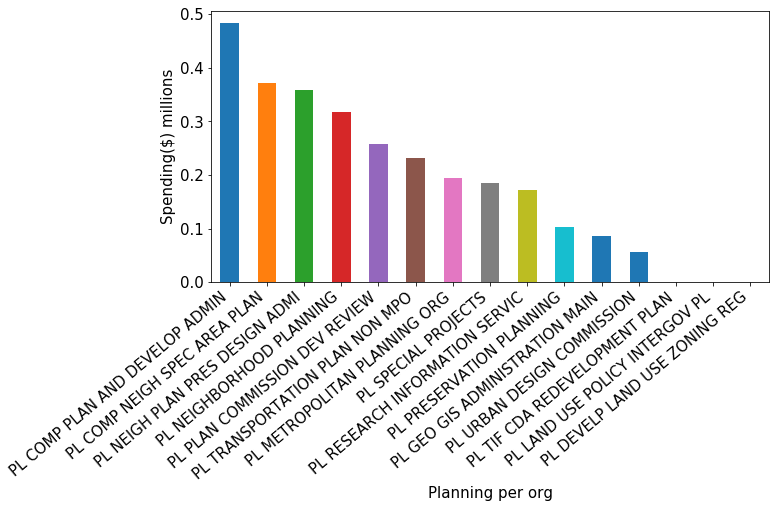

In [17]:
#changes in the top 5 spending excluding art
noart=planyearorg.drop(['PL MADISON ARTS PROGRAM'], axis=1)
plot9 = noart.mean().sort_values(ascending=False).T.plot.bar(figsize=(10,5),rot=0) 
plot9.set_ylabel("Spending($) millions")
plot9.set_xlabel("Planning per org")
plot9.set_xticklabels(plot9.get_xticklabels(), rotation=40, ha="right")


In [18]:
noart = noart.transpose()
noart

,2015,2016,2017,2018
PL METROPOLITAN PLANNING ORG,0.283503,0.258890,0.140959,0.094496
PL NEIGH PLAN PRES DESIGN ADMI,0.297465,0.335264,0.377865,0.421926
PL COMP NEIGH SPEC AREA PLAN,0.219246,0.365725,0.480060,0.420081
PL NEIGHBORHOOD PLANNING,0.252465,0.281964,0.360768,0.377337
PL TRANSPORTATION PLAN NON MPO,0.134689,0.203631,0.221787,0.365577
PL COMP PLAN AND DEVELOP ADMIN,0.340130,0.418839,0.603246,0.568047
PL PRESERVATION PLANNING,0.109043,0.108182,0.117936,0.078490
PL SPECIAL PROJECTS,0.212096,0.301593,0.100695,0.127823
PL RESEARCH INFORMATION SERVIC,0.225441,0.191919,0.162118,0.109070
PL PLAN COMMISSION DEV REVIEW,0.296121,0.236606,0.196876,0.298799


([<matplotlib.axis.XTick at 0x21a20e960b8>,
 <a list of 4 Text xticklabel objects>)

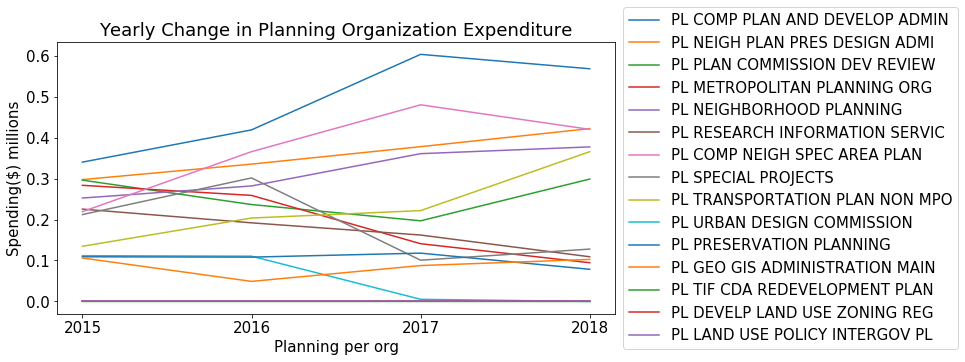

In [19]:
#changes in the top 5 spending excluding art line graph top 5

plot10 = noart.sort_values(by='2015', ascending=False).T.plot(figsize=(10,5),rot=0, title="Yearly Change in Planning Organization Expenditure") 
plot10.set_ylabel("Spending($) millions")
plot10.set_xlabel("Planning per org")
plot10.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(np.arange(4), noart)


,Change Rate
PL TRANSPORTATION PLAN NON MPO,171.422272
PL COMP NEIGH SPEC AREA PLAN,91.602733
PL COMP PLAN AND DEVELOP ADMIN,67.008759
PL NEIGHBORHOOD PLANNING,49.461057
PL NEIGH PLAN PRES DESIGN ADMI,41.840854
PL PLAN COMMISSION DEV REVIEW,0.904255
PL GEO GIS ADMINISTRATION MAIN,-3.313363
PL PRESERVATION PLANNING,-28.019417
PL SPECIAL PROJECTS,-39.733414
PL RESEARCH INFORMATION SERVIC,-51.619398


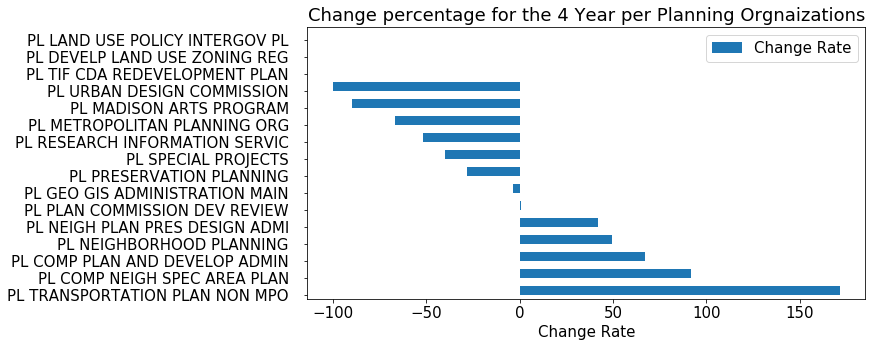

In [20]:
#changes rates for org
change=pd.DataFrame((planyearorg.transpose()["2018"]-planyearorg.transpose()["2015"])/planyearorg.transpose()["2015"]*100)
change.rename(columns={0:'Change Rate'}, inplace=True)
change=change.sort_values("Change Rate",ascending=False)
changeplot=change.transpose().T.plot.barh(figsize=(10,5),rot=0, align='edge', width=0.5, title="Change percentage for the 4 Year per Planning Orgnaizations") 

changeplot.legend(loc='upper right')
changeplot.tick_params(axis='y', which='major', pad=15)

changeplot.set_xlabel("Change Rate")
change

,2015,2016,2017,2018
PL TRANSPORTATION PLAN NON MPO,0.134689,0.203631,0.221787,0.365577
PL COMP NEIGH SPEC AREA PLAN,0.219246,0.365725,0.480060,0.420081
PL COMP PLAN AND DEVELOP ADMIN,0.340130,0.418839,0.603246,0.568047
PL NEIGHBORHOOD PLANNING,0.252465,0.281964,0.360768,0.377337
PL NEIGH PLAN PRES DESIGN ADMI,0.297465,0.335264,0.377865,0.421926


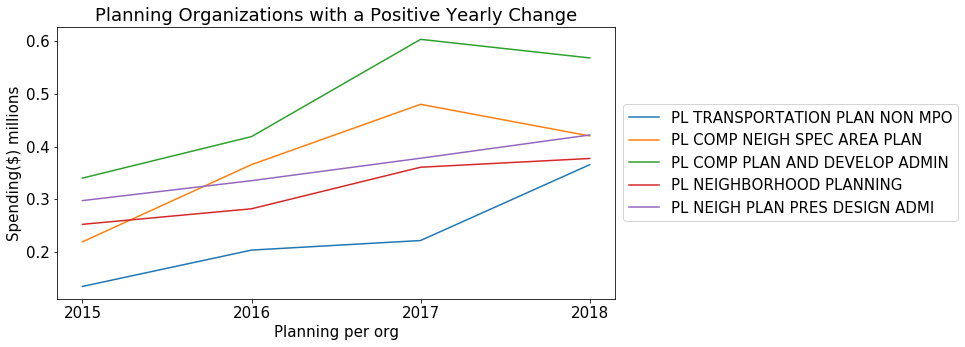

In [21]:
#change rate for only the positive change rate
c=change.transpose()
c=c.fillna(0)
a={}
for org in c:
    if 0<int(c[org]): 
        a[org] = (planyearorg[org])
a=pd.DataFrame(a)
a=a.transpose()
ab = a.T.plot(figsize=(10,5),rot=0,title="Planning Organizations with a Positive Yearly Change") 
ab.set_ylabel("Spending($) millions")
ab.set_xlabel("Planning per org")
ab.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(np.arange(4), a)
a

Text(0.8,0.55,'1.846316')

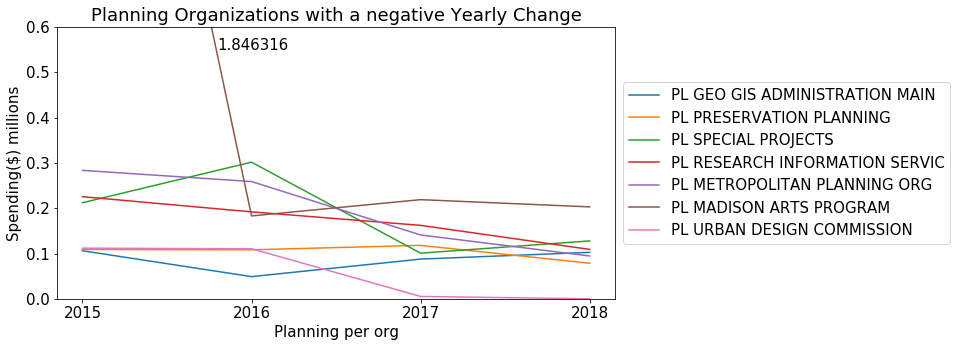

In [22]:
#change rate for only the negative change rate
c=change.transpose()
c=c.fillna(0)
a={}
for org in c:
    if 0>int(c[org]): 
        a[org] = (planyearorg[org])
a=pd.DataFrame(a)
a=a.transpose()
fig, ax = subplots()
ab = a.T.plot(figsize=(10,5),rot=0,ylim=(0,0.6), title="Planning Organizations with a negative Yearly Change",ax=ax) 
ab.set_ylabel("Spending($) millions")
ab.set_xlabel("Planning per org")
ab.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(np.arange(4), a)
ax.annotate('1.846316',(0.8, 0.55))

([<matplotlib.axis.XTick at 0x21a21a52d68>,
 <a list of 4 Text xticklabel objects>)

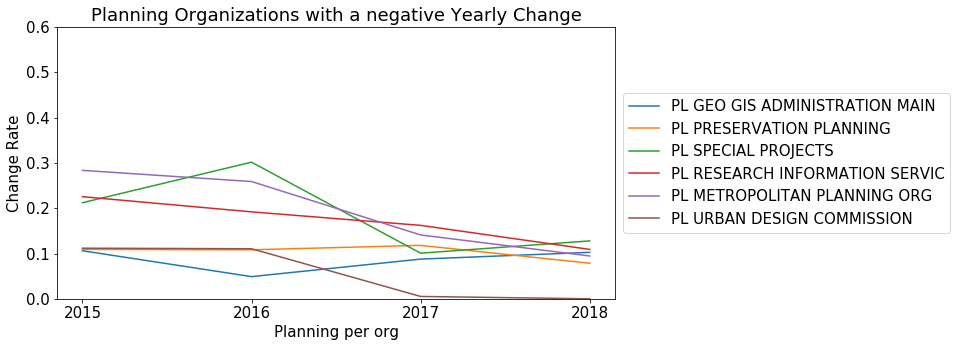

In [23]:
#change rate for only the negative change rate without art

c=change.transpose()
c=c.fillna(0)
a={}
for org in c:
    if 0>int(c[org]): 
        a[org] = (planyearorg[org])
a=pd.DataFrame(a)
a=a.drop(['PL MADISON ARTS PROGRAM'], axis=1)
a=a.transpose()

ab = a.T.plot(figsize=(10,5),rot=0,title="Planning Organizations with a negative Yearly Change") 
ab.set_ylabel("Change Rate")
ab.set_xlabel("Planning per org")
ab.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ab.set_ylim(0,0.6)
plt.xticks(np.arange(4), a)

In [24]:
art=agency[agency["Organization"] =="PL MADISON ARTS PROGRAM"]
agency

,Agency,Organization,Account Type,Character Code,Object,2015,2016,2017,2018
3645,PLANNING,PL METROPOLITAN PLANNING ORG,Expense,SUPPLIES,COPY PRINTING SUPPLIES,438.50,762.81,0.00,0.00
4139,PLANNING,PL NEIGH PLAN PRES DESIGN ADMI,Expense,PURCHASED SERVICES,TELEPHONE,798.31,921.24,1115.37,0.00
1093,PLANNING,PL COMP NEIGH SPEC AREA PLAN,Expense,SALARIES,COMPENSATED ABSENCE,0.00,0.00,1034.81,651.46
7134,PLANNING,PL COMP NEIGH SPEC AREA PLAN,Expense,SALARIES,PERMANENT WAGES,148417.65,217519.52,290009.94,254484.07
1078,PLANNING,PL COMP NEIGH SPEC AREA PLAN,Expense,PURCHASED SERVICES,OTHER SERVICES AND EXPENSES,0.00,0.00,870.60,0.00
4063,PLANNING,PL NEIGHBORHOOD PLANNING,Expense,PURCHASED SERVICES,MEMBERSHIPS,730.00,370.05,810.00,599.00
4027,PLANNING,PL NEIGH PLAN PRES DESIGN ADMI,Expense,BENEFITS,WAGE INSURANCE BENEFIT,704.14,747.50,1007.11,1298.41
3668,PLANNING,PL TRANSPORTATION PLAN NON MPO,Expense,PURCHASED SERVICES,MEMBERSHIPS,460.00,1805.00,1735.00,743.00
1442,PLANNING,PL COMP NEIGH SPEC AREA PLAN,Expense,PURCHASED SERVICES,FACILITY RENTAL,0.00,75.00,75.00,64.74
7316,PLANNING,PL METROPOLITAN PLANNING ORG,Expense,SALARIES,PERMANENT WAGES,550387.31,615377.56,451.65,0.00


AxesSubplot(0.125,0.125;0.775x0.755)


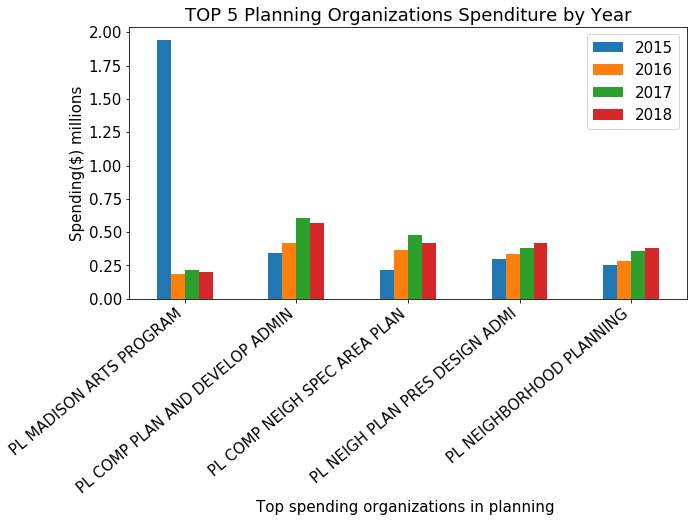

In [25]:
#yearly spending graph of the top five spenditure organization in planning
art=agency[agency["Organization"] =="PL MADISON ARTS PROGRAM"]
b=agency[agency["Organization"] =="PL COMP PLAN AND DEVELOP ADMIN"]
c=agency[agency["Organization"] =="PL COMP NEIGH SPEC AREA PLAN"]
d=agency[agency["Organization"] =="PL NEIGH PLAN PRES DESIGN ADMI"]
e=agency[agency["Organization"] =="PL NEIGHBORHOOD PLANNING"]
df = pd.concat([art,b,c,d,e])

agencydic= {"2015": {}, "2016": {} , "2017": {} , "2018": {} }
for year in agencydic:
    for code in df["Organization"]:
        if code not in agencydic[year]:
            a = df[df["Organization"]==code]
            summ = a[year].sum()
            agencydic[year][code] = copy.deepcopy(summ)
adf = pd.DataFrame(agencydic["2015"], index=["2015"])
bdf = pd.DataFrame(agencydic["2016"], index=["2016"])
cdf = pd.DataFrame(agencydic["2017"], index=["2017"])
ddf = pd.DataFrame(agencydic["2018"], index=["2018"])
new = pd.concat([adf, bdf, cdf, ddf])
new=new/1000000

plot4 = new.T.plot.bar(figsize=(10,5), title="TOP 5 Planning Organizations Spenditure by Year")
plot4.set_xticklabels(plot4.get_xticklabels(), rotation=40, ha="right")
plot4.set_ylabel("Spending($) millions")
plot4.set_xlabel("Top spending organizations in planning ")
print(plot4)

AxesSubplot(0.125,0.125;0.775x0.755)


,PURCHASED SERVICES,SALARIES,SUPPLIES,BENEFITS,INTERGOV REVENUES
2015,1.846316,0.077170,0.000109,0.029380,-0.01051
2016,0.092629,0.081248,0.001114,0.018485,-0.01051
2017,0.115405,0.083985,0.000397,0.019069,0.00000
2018,0.096329,0.085897,0.000013,0.020685,0.00000


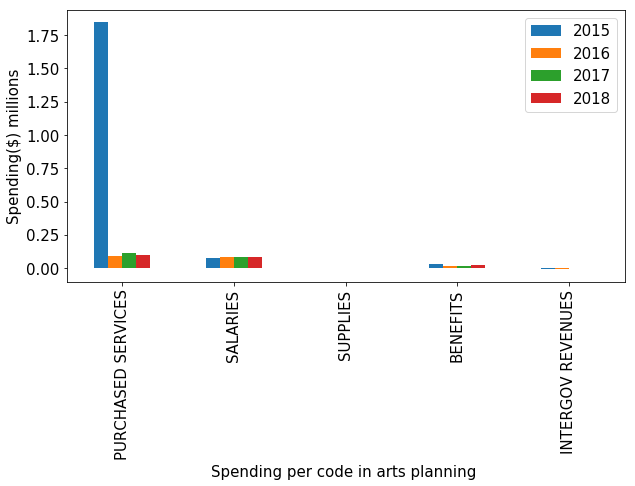

In [26]:
#character code for madison arts program 
agencydic= {"2015": {}, "2016": {} , "2017": {} , "2018": {} }
for year in agencydic:
    for code in art["Character Code"]:
        if code not in agencydic[year]:
            a = art[art["Character Code"]==code]
            summ = a[year].sum()
            agencydic[year][code] = copy.deepcopy(summ)
adf = pd.DataFrame(agencydic["2015"], index=["2015"])
bdf = pd.DataFrame(agencydic["2016"], index=["2016"])
cdf = pd.DataFrame(agencydic["2017"], index=["2017"])
ddf = pd.DataFrame(agencydic["2018"], index=["2018"])
artsum = pd.concat([adf, bdf, cdf, ddf])
artsum=artsum/1000000
plot5 = artsum.T.plot.bar(figsize=(10,5))
plot5.set_ylabel("Spending($) millions")
plot5.set_xlabel("Spending per code in arts planning ")
print(plot5)
artsum

In [27]:
#yearly spending graph of the top five spenditure organization in planning
art=agency[agency["Organization"] =="PL MADISON ARTS PROGRAM"]
b=agency[agency["Organization"] =="PL COMP PLAN AND DEVELOP ADMIN"]
c=agency[agency["Organization"] =="PL COMP NEIGH SPEC AREA PLAN"]
d=agency[agency["Organization"] =="PL NEIGH PLAN PRES DESIGN ADMI"]
e=agency[agency["Organization"] =="PL NEIGHBORHOOD PLANNING"]
df = pd.concat([art,b,c,d,e])



In [28]:
#character code for programs
agencydic= {"2015": {}, "2016": {} , "2017": {} , "2018": {} }
for year in agencydic:
    for code in b["Character Code"]:
        if code not in agencydic[year]:
            a = b[b["Character Code"]==code]
            summ = a[year].sum()
            agencydic[year][code] = copy.deepcopy(summ)
adf = pd.DataFrame(agencydic["2015"], index=["2015"])
bdf = pd.DataFrame(agencydic["2016"], index=["2016"])
cdf = pd.DataFrame(agencydic["2017"], index=["2017"])
ddf = pd.DataFrame(agencydic["2018"], index=["2018"])
bsum = pd.concat([adf, bdf, cdf, ddf])
bsum=bsum/1000000

agencydic= {"2015": {}, "2016": {} , "2017": {} , "2018": {} }
for year in agencydic:
    for code in c["Character Code"]:
        if code not in agencydic[year]:
            a = c[c["Character Code"]==code]
            summ = a[year].sum()
            agencydic[year][code] = copy.deepcopy(summ)
adf = pd.DataFrame(agencydic["2015"], index=["2015"])
bdf = pd.DataFrame(agencydic["2016"], index=["2016"])
cdf = pd.DataFrame(agencydic["2017"], index=["2017"])
ddf = pd.DataFrame(agencydic["2018"], index=["2018"])
csum = pd.concat([adf, bdf, cdf, ddf])
csum=csum/1000000

agencydic= {"2015": {}, "2016": {} , "2017": {} , "2018": {} }
for year in agencydic:
    for code in d["Character Code"]:
        if code not in agencydic[year]:
            a = d[d["Character Code"]==code]
            summ = a[year].sum()
            agencydic[year][code] = copy.deepcopy(summ)
adf = pd.DataFrame(agencydic["2015"], index=["2015"])
bdf = pd.DataFrame(agencydic["2016"], index=["2016"])
cdf = pd.DataFrame(agencydic["2017"], index=["2017"])
ddf = pd.DataFrame(agencydic["2018"], index=["2018"])
dsum = pd.concat([adf, bdf, cdf, ddf])
dsum=dsum/1000000


agencydic= {"2015": {}, "2016": {} , "2017": {} , "2018": {} }
for year in agencydic:
    for code in e["Character Code"]:
        if code not in agencydic[year]:
            a = e[e["Character Code"]==code]
            summ = a[year].sum()
            agencydic[year][code] = copy.deepcopy(summ)
adf = pd.DataFrame(agencydic["2015"], index=["2015"])
bdf = pd.DataFrame(agencydic["2016"], index=["2016"])
cdf = pd.DataFrame(agencydic["2017"], index=["2017"])
ddf = pd.DataFrame(agencydic["2018"], index=["2018"])
esum = pd.concat([adf, bdf, cdf, ddf])
esum=esum/1000000

In [29]:
agencydic= {"2015": {}, "2016": {} , "2017": {} , "2018": {} }
for year in agencydic:
    for code in df["Organization"]:
        if code not in agencydic[year]:
            a = df[df["Organization"]==code]
            summ = a[year].sum()
            agencydic[year][code] = copy.deepcopy(summ)
adf = pd.DataFrame(agencydic["2015"], index=["2015"])
bdf = pd.DataFrame(agencydic["2016"], index=["2016"])
cdf = pd.DataFrame(agencydic["2017"], index=["2017"])
ddf = pd.DataFrame(agencydic["2018"], index=["2018"])
new = pd.concat([adf, bdf, cdf, ddf])
new=new/1000000

artdf=pd.DataFrame(new["PL MADISON ARTS PROGRAM"])
pd.concat([artdf, artsum], axis=1, join_axes=[artdf.index])

,PL MADISON ARTS PROGRAM,PURCHASED SERVICES,SALARIES,SUPPLIES,BENEFITS,INTERGOV REVENUES
2015,1.942465,1.846316,0.077170,0.000109,0.029380,-0.01051
2016,0.182965,0.092629,0.081248,0.001114,0.018485,-0.01051
2017,0.218855,0.115405,0.083985,0.000397,0.019069,0.00000
2018,0.202924,0.096329,0.085897,0.000013,0.020685,0.00000


In [30]:
artsum=artsum.set_index([pd.Index(["2015", "2016", "2017", "PL MADISON ARTS PROGRAM 2018"])]) 
bsum=bsum.set_index(pd.Index(["2015", "2016", "2017", "PL COMP PLAN AND DEVELOP ADMIN 2018"]))
csum=csum.set_index(pd.Index(["2015", "2016", "2017", "PL COMP NEIGH SPEC AREA PLAN 2018"]))
dsum=dsum.set_index(pd.Index(["2015", "2016", "2017", "PL NEIGH PLAN PRES DESIGN ADM 2018"]))
esum=esum.set_index(pd.Index(["2015", "2016", "2017", "PL NEIGHBORHOOD PLANNING 2018"]))
stackdata=pd.concat([artsum, bsum, csum, dsum, esum])
ps = stackdata['PURCHASED SERVICES']
stackdata.drop(labels=['PURCHASED SERVICES'], axis=1,inplace = True)
stackdata.insert(9, 'PURCHASED SERVICES', ps)
stackdata

C:\cs301\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,BENEFITS,CHARGES FOR SERVICES,INTER DEPART BILLING,INTER DEPART CHARGES,INTERGOV REVENUES,INVEST OTHER CONTRIB,OTHER FINANCE SOURCE,SALARIES,SUPPLIES,PURCHASED SERVICES
2015,0.029380,NaN,NaN,NaN,-0.010510,NaN,NaN,0.077170,0.000109,1.846316
2016,0.018485,NaN,NaN,NaN,-0.010510,NaN,NaN,0.081248,0.001114,0.092629
2017,0.019069,NaN,NaN,NaN,0.000000,NaN,NaN,0.083985,0.000397,0.115405
PL MADISON ARTS PROGRAM 2018,0.020685,NaN,NaN,NaN,0.000000,NaN,NaN,0.085897,0.000013,0.096329
2015,0.056321,NaN,NaN,0.042846,0.000000,NaN,NaN,0.203733,0.019640,0.017590
2016,0.059801,NaN,NaN,0.042879,-0.007500,NaN,NaN,0.272602,0.030147,0.020910
2017,0.124605,NaN,NaN,0.042501,-0.006653,NaN,NaN,0.328777,0.044529,0.069487
PL COMP PLAN AND DEVELOP ADMIN 2018,0.095561,NaN,NaN,0.043525,0.000000,NaN,NaN,0.332655,0.023837,0.072469
2015,0.046250,NaN,NaN,NaN,NaN,NaN,NaN,0.151489,0.000000,0.021506
2016,0.059777,NaN,NaN,NaN,NaN,NaN,NaN,0.222172,0.000000,0.083776


Text(0.59,0.8,'1.846316')

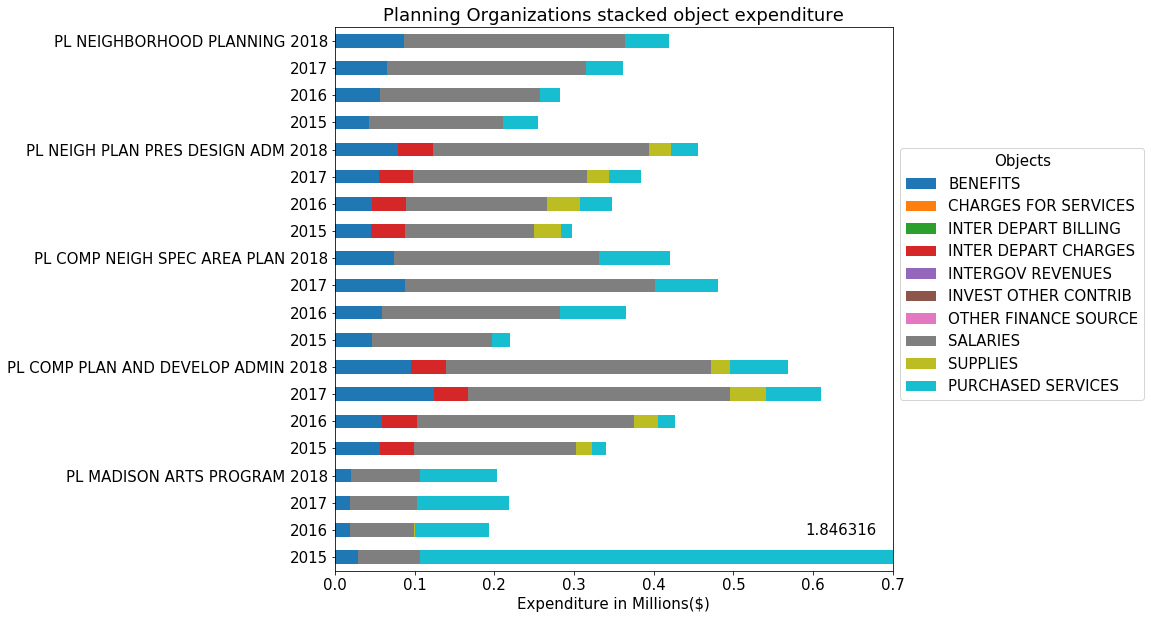

In [31]:
fig, ax = subplots()
stackplot=stackdata.transpose().T.plot.barh(figsize=(10,10),xlim=(0,0.7), stacked= True, title="Planning Organizations stacked object expenditure", ax=ax)
stackplot.set_xlabel("Expenditure in Millions($)")
stackplot.legend(title='Objects', bbox_to_anchor=(1, 0.3))
ax.annotate('1.846316',(0.59, 0.8))


In [32]:
artobj = art[art["Character Code"]=="PURCHASED SERVICES"]


Text(0.5,0,'Spending per object in arts planning ')

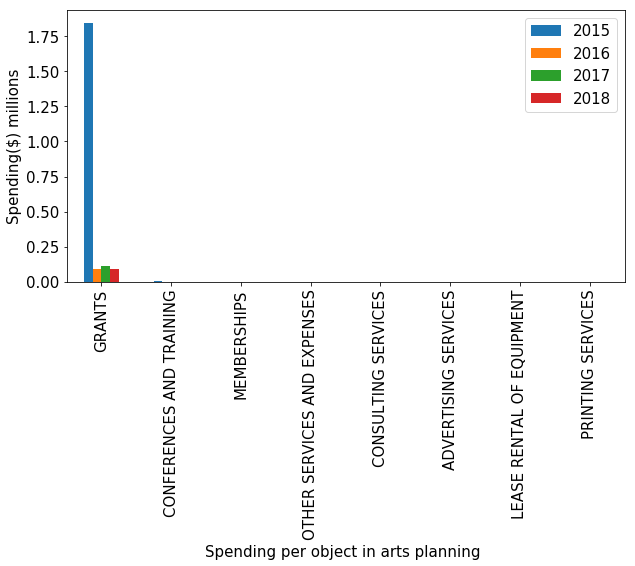

In [33]:
agencydic= {"2015": {}, "2016": {} , "2017": {} , "2018": {} }
for year in agencydic:
    for code in artobj["Object"]:
        if code not in agencydic[year]:
            a = artobj[artobj["Object"]==code]
            summ = a[year].sum()
            agencydic[year][code] = copy.deepcopy(summ)
adf = pd.DataFrame(agencydic["2015"], index=["2015"])
bdf = pd.DataFrame(agencydic["2016"], index=["2016"])
cdf = pd.DataFrame(agencydic["2017"], index=["2017"])
ddf = pd.DataFrame(agencydic["2018"], index=["2018"])
artobjsum = pd.concat([adf, bdf, cdf, ddf])
artobjsum=artobjsum/1000000
#artobjsum.sort_values(by="2015", ascending=False)
plot6=artobjsum.transpose().sort_values(by="2015", ascending=False).transpose().T.plot.bar(figsize=(10,5))
plot6.set_ylabel("Spending($) millions")
plot6.set_xlabel("Spending per object in arts planning ")

AxesSubplot(0.125,0.125;0.775x0.755)


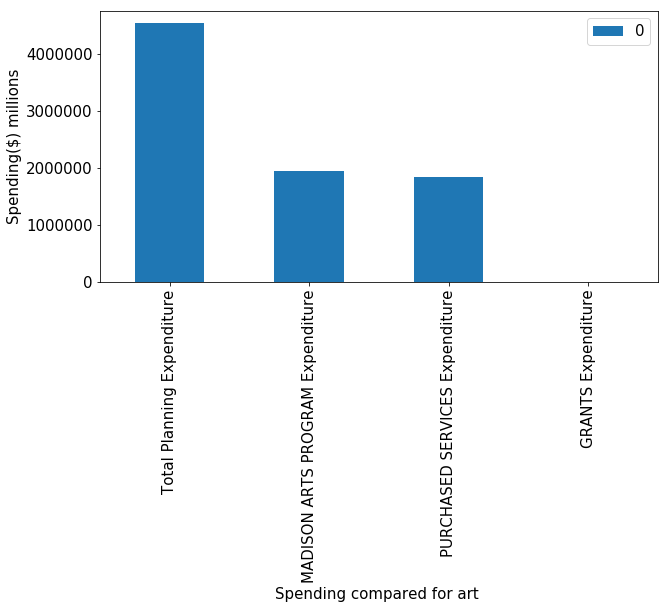

In [34]:
total = agency["2015"].sum()
total2 = art["2015"].sum()
total3 = artobj["2015"].sum()
total4 = (artobj[artobj["Object"]=="54815 - GRANTS"])["2015"].sum()
agencydic= {}
#agencydic["Year"] = 2015
agencydic["Total Planning Expenditure"] = total
agencydic["MADISON ARTS PROGRAM Expenditure"] = total2
agencydic["PURCHASED SERVICES Expenditure"] = total3
agencydic["GRANTS Expenditure"] = total4

dff=pd.DataFrame(agencydic,index=[0])

plot7= dff.T.plot.bar(figsize=(10,5))
plot7.set_ylabel("Spending($) millions")
plot7.set_xlabel("Spending compared for art ")
print(plot7)


In [47]:
#http://data-cityofmadison.opendata.arcgis.com/datasets/43743f819e1d4e7ab35a202e442cf27c_28/data
#Data from city of madison on Bus Rapid Routes 
#Planning Transportation MPO
#https://www.cityofmadison.com/dpced/planning/documents/MIM%20priority%20recomendations.pdf
import pandas
from pandas.io.json import json_normalize

res = requests.get("https://opendata.arcgis.com/datasets/43743f819e1d4e7ab35a202e442cf27c_28.geojson")
j = res.json()

dic= []
for object in j["features"]:
    object["properties"]
    object["properties"]["coordinates"]=object["geometry"]["coordinates"]
    dic.append(object["properties"])

pd.DataFrame(dic).to_csv("busrapidtransitstops.csv", encoding='utf-8', index=False)            
rbusdata=pd.read_csv("busrapidtransitstops.csv")
rbusdata=rbusdata.set_index(rbusdata["OBJECTID"])
rbusdata["Notes"] = rbusdata['Notes'].fillna("")
rbusdata["MetroID"] = rbusdata['MetroID'].fillna(0)
rbusdata

,MetroID,Notes,OBJECTID,coordinates,stop_id,stop_lat,stop_lon,stop_name
OBJECTID,,,,,,,,
1,809.0,,1,"[-89.4110859632727, 43.07325805819196]",91001,43.073258,-89.411086,EB CAMPUS ns BABCOCK RR
2,741.0,,2,"[-89.4043089661151, 43.072085058177706]",91002,43.072085,-89.404309,EB W JOHNSON ns MILLS
3,455.0,,3,"[-89.400131967395, 43.07201905809875]",91003,43.072019,-89.400132,EB W JOHNSON fs N PARK
4,555.0,,4,"[-89.39329196869723, 43.072363057733206]",91004,43.072363,-89.393292,EB W JOHNSON fs BASSETT
5,883.0,,5,"[-89.3882599703234, 43.07470505644012]",91005,43.074705,-89.388260,EB STATE ns FAIRCHILD
6,1101.0,,6,"[-89.38385397193187, 43.0733250570924]",91006,43.073325,-89.383854,EB MAIN fs CARROLL
7,1323.0,,7,"[-89.38155697266535, 43.07637905618432]",91007,43.076379,-89.381557,EB EAST WASH fs WEBSTER
8,1579.0,Relo west a little,8,"[-89.37880097342108, 43.07832005554184]",91008,43.078320,-89.378801,EB EAST WASH ns BLAIR
9,1565.0,Pull out if no bus lane,9,"[-89.37300597371306, 43.08237205461155]",91009,43.082372,-89.373006,EB EAST WASH fs PATERSON


In [48]:
#number of people commute data 
#http://data-cityofmadison.opendata.arcgis.com/datasets/2bfd47ada14542c5969a6eb7e6f274dd_31/data?geometry=-89.544%2C43.049%2C-89.283%2C43.093
res = requests.get("https://opendata.arcgis.com/datasets/2bfd47ada14542c5969a6eb7e6f274dd_31.geojson")
j = res.json()

dic= []
for object in j["features"]:
    object["properties"]
    object["properties"]["coordinates"]=object["geometry"]["coordinates"]
    dic.append(object["properties"])

pd.DataFrame(dic).to_csv("workplacedata.csv", encoding='utf-8', index=False)            
wpdata=pd.read_csv("workplacedata.csv")
wpdata=wpdata.set_index(wpdata["OBJECTID"])
wpdata



,Bicycle,Bus,Carpool2,Carpool3,Carpool4,Carpool5,Carpool7,DES_ID,DES_ID_1,DES_LENGTH,...,Rail,ShapeSTLength,Subway,Taxi,Total,Trolley,WORKPLACE,Walked,WorkedHome,coordinates
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.00,10.00,14888.338340,...,0.0,14888.338340,0.0,0.0,10.0,0.0,"Census Tract 10, Dane County, Wisconsin",0.0,0.0,"[[-89.47539185715189, 43.08293455103483], [-89..."
2,0.0,25.0,0.0,0.0,0.0,0.0,0.0,101.00,101.00,7271.941348,...,0.0,7271.941348,0.0,0.0,35.0,0.0,"Census Tract 101, Dane County, Wisconsin",0.0,0.0,"[[-89.47539185715189, 43.08293455103483], [-89..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.00,102.00,30090.845436,...,NaN,30090.845436,NaN,NaN,NaN,NaN,"Census Tract 102, Dane County, Wisconsin",NaN,NaN,"[[-89.47539185715189, 43.08293455103483], [-89..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.00,103.00,37615.520001,...,NaN,37615.520001,NaN,NaN,NaN,NaN,"Census Tract 103, Dane County, Wisconsin",NaN,NaN,"[[-89.47539185715189, 43.08293455103483], [-89..."
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.00,104.00,39009.663787,...,NaN,39009.663787,NaN,NaN,NaN,NaN,"Census Tract 104, Dane County, Wisconsin",NaN,NaN,"[[-89.47539185715189, 43.08293455103483], [-89..."
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.01,105.01,51567.503958,...,NaN,51567.503958,NaN,NaN,NaN,NaN,"Census Tract 105.01, Dane County, Wisconsin",NaN,NaN,"[[-89.47539185715189, 43.08293455103483], [-89..."
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.02,105.02,61023.656158,...,NaN,61023.656158,NaN,NaN,NaN,NaN,"Census Tract 105.02, Dane County, Wisconsin",NaN,NaN,"[[-89.47539185715189, 43.08293455103483], [-89..."
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.00,106.00,56599.141943,...,NaN,56599.141943,NaN,NaN,NaN,NaN,"Census Tract 106, Dane County, Wisconsin",NaN,NaN,"[[-89.47539185715189, 43.08293455103483], [-89..."
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.01,107.01,32425.511744,...,NaN,32425.511744,NaN,NaN,NaN,NaN,"Census Tract 107.01, Dane County, Wisconsin",NaN,NaN,"[[-89.47539185715189, 43.08293455103483], [-89..."


Bicycle                                                       6242
Bus                                                          11879
Carpool2                                                     19035
Carpool3                                                      2653
Carpool4                                                       583
Carpool5                                                       134
Carpool7                                                       415
DES_ID                                                 2.78628e+06
DES_ID_1                                               2.78628e+06
DES_LENGTH                                              5.9151e+08
DroveAlone                                                  171701
Ferry                                                           15
Motorcycle                                                     775
OBJECTID                                                  64326153
OBJECTID_1                                                6493

In [50]:
#data clean up 
dic = []
for coor in wpdata["coordinates"]:
    coor = str(coor)
    coor = coor.replace("[", "")
    coor = coor.replace("]", "")
    coor = coor.replace(",", "")
    #coor = coor.replace("-", "")
    coor = coor.split()
    dic.append(coor)
wpdata["coordinates"] = dic
dic = []
for coor in rbusdata["coordinates"]:
    coor = str(coor)
    coor = coor.replace("[", "")
    coor = coor.replace("]", "")
    coor = coor.replace(",", "")
    #coor = coor.replace("-", "")
    coor = coor.split()
    dic.append(coor)
rbusdata["coordinates"] = dic


In [58]:
wpdata["OBJECTID"]

OBJECTID
1            1
2            2
3            3
4            4
5            5
6            6
7            7
8            8
9            9
10          10
11          11
12          12
13          13
14          14
15          15
16          16
17          17
18          18
19          19
20          20
21          21
22          22
23          23
24          24
25          25
26          26
27          27
28          28
29          29
30          30
         ...  
11313    11313
11314    11314
11315    11315
11316    11316
11317    11317
11318    11318
11319    11319
11320    11320
11321    11321
11322    11322
11323    11323
11324    11324
11325    11325
11326    11326
11327    11327
11328    11328
11329    11329
11330    11330
11331    11331
11332    11332
11333    11333
11334    11334
11335    11335
11336    11336
11337    11337
11338    11338
11339    11339
11340    11340
11341    11341
11342    11342
Name: OBJECTID, Length: 11342, dtype: int64

In [51]:
a =["-89.3583455907738", "43.06840548412097"]
a[0]
art[art["Character Code"]=="PURCHASED SERVICES"]
print(len(rbusdata))
print(len(rbusdata["coordinates"]))
dic=[]
print(dic)
for index in wpdata["OBJECTID"]:
    dic.append(wpdata[wpdata["OBJECTID"]==index])
pd.concat(dic)


119
119
[]


,Bicycle,Bus,Carpool2,Carpool3,Carpool4,Carpool5,Carpool7,DES_ID,DES_ID_1,DES_LENGTH,...,Rail,ShapeSTLength,Subway,Taxi,Total,Trolley,WORKPLACE,Walked,WorkedHome,coordinates
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.00,10.00,14888.338340,...,0.0,14888.338340,0.0,0.0,10.0,0.0,"Census Tract 10, Dane County, Wisconsin",0.0,0.0,"[-89.47539185715189, 43.08293455103483, -89.43..."
2,0.0,25.0,0.0,0.0,0.0,0.0,0.0,101.00,101.00,7271.941348,...,0.0,7271.941348,0.0,0.0,35.0,0.0,"Census Tract 101, Dane County, Wisconsin",0.0,0.0,"[-89.47539185715189, 43.08293455103483, -89.44..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.00,102.00,30090.845436,...,NaN,30090.845436,NaN,NaN,NaN,NaN,"Census Tract 102, Dane County, Wisconsin",NaN,NaN,"[-89.47539185715189, 43.08293455103483, -89.37..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.00,103.00,37615.520001,...,NaN,37615.520001,NaN,NaN,NaN,NaN,"Census Tract 103, Dane County, Wisconsin",NaN,NaN,"[-89.47539185715189, 43.08293455103483, -89.33..."
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.00,104.00,39009.663787,...,NaN,39009.663787,NaN,NaN,NaN,NaN,"Census Tract 104, Dane County, Wisconsin",NaN,NaN,"[-89.47539185715189, 43.08293455103483, -89.33..."
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.01,105.01,51567.503958,...,NaN,51567.503958,NaN,NaN,NaN,NaN,"Census Tract 105.01, Dane County, Wisconsin",NaN,NaN,"[-89.47539185715189, 43.08293455103483, -89.29..."
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.02,105.02,61023.656158,...,NaN,61023.656158,NaN,NaN,NaN,NaN,"Census Tract 105.02, Dane County, Wisconsin",NaN,NaN,"[-89.47539185715189, 43.08293455103483, -89.27..."
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.00,106.00,56599.141943,...,NaN,56599.141943,NaN,NaN,NaN,NaN,"Census Tract 106, Dane County, Wisconsin",NaN,NaN,"[-89.47539185715189, 43.08293455103483, -89.31..."
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.01,107.01,32425.511744,...,NaN,32425.511744,NaN,NaN,NaN,NaN,"Census Tract 107.01, Dane County, Wisconsin",NaN,NaN,"[-89.47539185715189, 43.08293455103483, -89.44..."


In [65]:
#choosing locations that are 10 min away from bus stop from wpdata 
# approximate radius of earth in km
#ref https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
from math import sin, cos, sqrt, atan2, radians
dic= []
R = 6373.0

for index in wpdata["OBJECTID"]:
    coordinates = wpdata[wpdata["OBJECTID"] == index]
    coordinates = coordinates["coordinates"]
    for bcoor in rbusdata["coordinates"]:
        for coor in coordinates:                    
            lat1 = radians(float(coor[1]))
            lon1 = radians(float(coor[0]))
            lat2 = radians(float(bcoor[1]))
            lon2 = radians(float(bcoor[0]))
            dlon = lon2 - lon1
            dlat = lat2 - lat1
            a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
            c = 2 * atan2(sqrt(a), sqrt(1 - a))
            distance = R * c
            if distance <= 0.6:
                for bcoorr in rbusdata["coordinates"]:
                    lat1 = radians(float(coor[3]))
                    lon1 = radians(float(coor[2]))
                    lat2 = radians(float(bcoorr[1]))
                    lon2 = radians(float(bcoorr[0]))
                    dlon = lon2 - lon1
                    dlat = lat2 - lat1
                    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
                    c = 2 * atan2(sqrt(a), sqrt(1 - a))
                    distance = R * c
                    if distance <= 0.6:
                        dic.append(wpdata[wpdata["OBJECTID"]==index])
                       
data=pd.concat(dic)
data                    
            

        

,Bicycle,Bus,Carpool2,Carpool3,Carpool4,Carpool5,Carpool7,DES_ID,DES_ID_1,DES_LENGTH,...,Rail,ShapeSTLength,Subway,Taxi,Total,Trolley,WORKPLACE,Walked,WorkedHome,coordinates
OBJECTID,,,,,,,,,,,,,,,,,,,,,
227,4.0,4.0,10.0,0.0,0.0,0.0,0.0,11.01,11.01,11461.415810,...,0.0,11461.415810,0.0,0.0,55.0,0.0,"Census Tract 11.01, Dane County, Wisconsin",10.0,0.0,"[-89.4487037217782, 43.07901968394355, -89.407..."
227,4.0,4.0,10.0,0.0,0.0,0.0,0.0,11.01,11.01,11461.415810,...,0.0,11461.415810,0.0,0.0,55.0,0.0,"Census Tract 11.01, Dane County, Wisconsin",10.0,0.0,"[-89.4487037217782, 43.07901968394355, -89.407..."
227,4.0,4.0,10.0,0.0,0.0,0.0,0.0,11.01,11.01,11461.415810,...,0.0,11461.415810,0.0,0.0,55.0,0.0,"Census Tract 11.01, Dane County, Wisconsin",10.0,0.0,"[-89.4487037217782, 43.07901968394355, -89.407..."
227,4.0,4.0,10.0,0.0,0.0,0.0,0.0,11.01,11.01,11461.415810,...,0.0,11461.415810,0.0,0.0,55.0,0.0,"Census Tract 11.01, Dane County, Wisconsin",10.0,0.0,"[-89.4487037217782, 43.07901968394355, -89.407..."
227,4.0,4.0,10.0,0.0,0.0,0.0,0.0,11.01,11.01,11461.415810,...,0.0,11461.415810,0.0,0.0,55.0,0.0,"Census Tract 11.01, Dane County, Wisconsin",10.0,0.0,"[-89.4487037217782, 43.07901968394355, -89.407..."
227,4.0,4.0,10.0,0.0,0.0,0.0,0.0,11.01,11.01,11461.415810,...,0.0,11461.415810,0.0,0.0,55.0,0.0,"Census Tract 11.01, Dane County, Wisconsin",10.0,0.0,"[-89.4487037217782, 43.07901968394355, -89.407..."
227,4.0,4.0,10.0,0.0,0.0,0.0,0.0,11.01,11.01,11461.415810,...,0.0,11461.415810,0.0,0.0,55.0,0.0,"Census Tract 11.01, Dane County, Wisconsin",10.0,0.0,"[-89.4487037217782, 43.07901968394355, -89.407..."
227,4.0,4.0,10.0,0.0,0.0,0.0,0.0,11.01,11.01,11461.415810,...,0.0,11461.415810,0.0,0.0,55.0,0.0,"Census Tract 11.01, Dane County, Wisconsin",10.0,0.0,"[-89.4487037217782, 43.07901968394355, -89.407..."
227,4.0,4.0,10.0,0.0,0.0,0.0,0.0,11.01,11.01,11461.415810,...,0.0,11461.415810,0.0,0.0,55.0,0.0,"Census Tract 11.01, Dane County, Wisconsin",10.0,0.0,"[-89.4487037217782, 43.07901968394355, -89.407..."


In [74]:
data=data.drop_duplicates(subset=["OBJECTID"], keep="first")
data.sum()

    

Bicycle                                                       2159
Bus                                                           2707
Carpool2                                                       827
Carpool3                                                        94
Carpool4                                                        34
Carpool5                                                        40
Carpool7                                                        15
DES_ID                                                     6740.28
DES_ID_1                                                   6740.28
DES_LENGTH                                             5.15393e+06
DroveAlone                                                    6040
Ferry                                                           15
Motorcycle                                                      58
OBJECTID                                                   2086029
OBJECTID_1                                                 114

Bicycle        2.159
Bus            2.707
Carpool2       0.827
Carpool3       0.094
Carpool4       0.034
Carpool5       0.040
Carpool7       0.015
DroveAlone     6.040
Ferry          0.015
Motorcycle     0.058
Other          0.069
Rail           0.000
Subway         0.000
Taxi           0.040
Total         17.905
Trolley        0.000
Walked         5.814
WorkedHome     0.000
dtype: float64


Text(0.5,0,'Number of commuters per 1000')

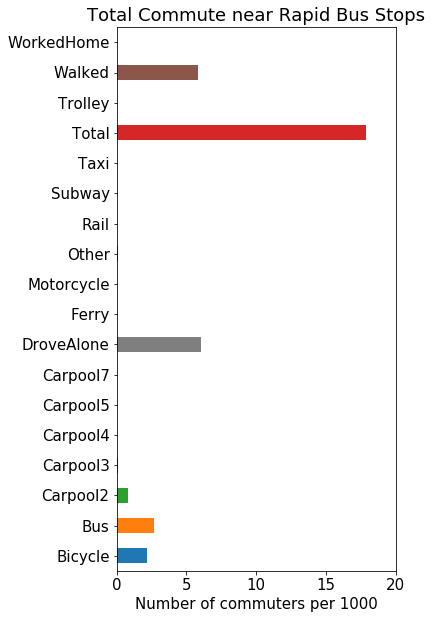

In [76]:
data.sort_values(by="Bus", ascending=False)
data1 = copy.deepcopy(data)
data1.drop('DES_ID', axis=1, inplace=True)
data1.drop('DES_ID_1', axis=1, inplace=True)
data1.drop('DES_LENGTH', axis=1, inplace=True)
data1.drop('OBJECTID_1', axis=1, inplace=True)
data1.drop('OBJECTID', axis=1, inplace=True)
data1.drop('ORG_DES_ID', axis=1, inplace=True)
data1.drop('ORG_DES_ID_1', axis=1, inplace=True)
data1.drop('ORG_ID', axis=1, inplace=True)
data1.drop('ORG_ID_1', axis=1, inplace=True)
data1.drop('RESIDENCE', axis=1, inplace=True)
data1.drop('ShapeSTLength', axis=1, inplace=True)
data1.drop('WORKPLACE', axis=1, inplace=True)
data1.drop('coordinates', axis=1, inplace=True)
data1=data1.sum()/1000
print(data1)
fig, ax = subplots()
data1=data1.T.plot.barh(figsize=(5,10),title="Total Commute near Rapid Bus Stops",xlim=(0,20), ax=ax) 
data1
ax.annotate('',(70, 13))
ax.annotate('',(70, 15))
data1.set_xlabel("Number of commuters per 1000")

In [ ]:
#http://data-cityofmadison.opendata.arcgis.com/datasets/3afa8d889c8541ec8cbd89c5845921a2_26
#2015 ridership data by stops

res = requests.get("https://opendata.arcgis.com/datasets/3afa8d889c8541ec8cbd89c5845921a2_26.geojson")
j = res.json()
dic= []
for object in j["features"]:
    object["properties"]
    object["properties"]["coordinates"]=object["geometry"]["coordinates"]
    dic.append(object["properties"])

pd.DataFrame(dic).to_csv("rideship2015.csv", encoding='utf-8', index=False)            #
ride15=pd.read_csv("rideship2015.csv")
ride15=ride15.set_index(ride15["OBJECTID"])
ride15

In [ ]:
#http://data-cityofmadison.opendata.arcgis.com/items/3afa8d889c8541ec8cbd89c5845921a2
#2017 ridership data by stops

res = requests.get("https://maps.cityofmadison.com/arcgis/rest/services/Public/OPEN_DATA_TRANS/MapServer/26/query?outFields=*&where=1%3D1&f=geojson")
j = res.json()
dic= []
for object in j["features"]:
    object["properties"]
    object["properties"]["coordinates"]=object["geometry"]["coordinates"]
    dic.append(object["properties"])

pd.DataFrame(dic).to_csv("rideship2017.csv", encoding='utf-8', index=False)            #
ride17=pd.read_csv("rideship2015.csv")
ride17=ride17.set_index(ride17["OBJECTID"])
ride17

In [160]:
bus=agency[agency["Organization"] =="PL TRANSPORTATION PLAN NON MPO"]

TypeError: string indices must be integers

In [62]:
https://opendata.arcgis.com/datasets/3afa8d889c8541ec8cbd89c5845921a2_26.geojson

SyntaxError: invalid syntax (<ipython-input-62-c644d7e51ec6>, line 1)

In [ ]:
dff.Year = pd.to_datetime(dff.Year)

pd.crosstab(dff.Year, dff["Total Planning Expenditure"], dff["MADISON ARTS PROGRAM Expenditure"],dff["PURCHASED SERVICES Expenditure"],dff["GRANTS Expenditure"].plot.barh(stacked=True)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plot
dff.Year = pd.to_datetime(dff.Year)

cumval=0
fig = plt.figure(figsize=(12,8))
for col in dff.columns[~dff.columns.isin(['Year'])]:
    plt.bar(dff.Year, dff[col], bottom=cumval, label=col)
    cumval = cumval+dff[col]

_ = plt.xticks(rotation=30)
_ = plt.legend(fontsize=18)

In [ ]:
#bar plot for planning yearly budget by organization
plot1 = planyearsum.T.plot.bar(figsize=(10,5))
plot1.set_ylabel("Spending($) in millions")

plot1.set_xlabel("Planning per organization ")
print(plot1)


In [63]:
#data frame for planning yearly budget by charactercodes 
agency = mfdf[mfdf['Agency']=="PLANNING"]
agency1 = mfdf[mfdf['Agency']=="COMMUNITY DEVELOPMENT"]
agencydic= {"2015": {}, "2016": {} , "2017": {} , "2018": {} }
for year in agencydic:
    for code in agency["Character Code"]:
        if code not in agencydic[year]:
            a = agency[agency["Character Code"]==code]
            summ = a[year].sum()
            agencydic[year][code] = copy.deepcopy(summ)
adf = pd.DataFrame(agencydic["2015"], index=["2015"])
bdf = pd.DataFrame(agencydic["2016"], index=["2016"])
cdf = pd.DataFrame(agencydic["2017"], index=["2017"])
ddf = pd.DataFrame(agencydic["2018"], index=["2018"])
planyearsum = pd.concat([adf, bdf, cdf, ddf])
planyearsum=planyearsum/1000000
planyearsum

     

,SUPPLIES,PURCHASED SERVICES,SALARIES,BENEFITS,INTERGOV REVENUES,INVEST OTHER CONTRIB,TRANSFER IN,CHARGES FOR SERVICES,INTER DEPART CHARGES,OTHER FINANCE SOURCE,TRANSFER OUT,MISC REVENUE,INTER DEPART BILLING
2015,0.069103,2.224519,2.156064,0.726724,-0.048178,-0.002800,-0.683795,-0.000020,0.088855,0.0,0.000000,0.000000,0.0000
2016,0.165232,0.531358,2.355865,0.701371,-0.073864,-0.004957,-0.809851,-0.002512,0.088956,0.0,0.093433,0.000000,0.0000
2017,0.073968,0.363159,1.847123,0.594384,-0.025044,-0.005800,0.000000,-0.005818,0.085002,0.0,0.147053,0.000000,0.0000
2018,0.056268,0.362766,2.005044,0.644448,0.000000,-0.034352,0.000000,-0.013641,0.087051,0.0,0.107271,-0.006225,-0.0415


AxesSubplot(0.125,0.125;0.775x0.755)


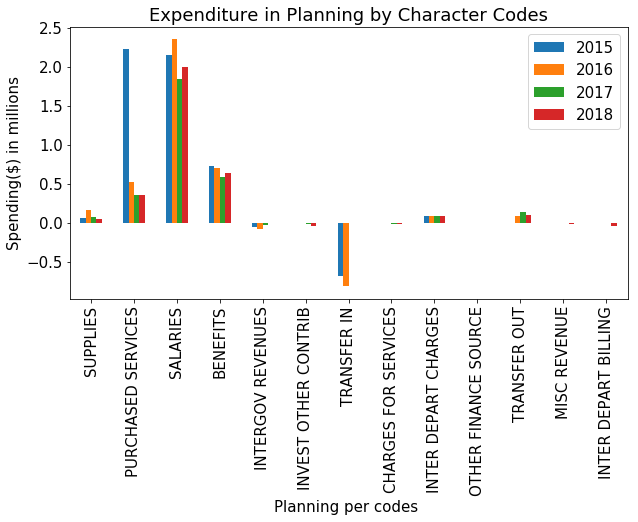

In [64]:
#bar plot for planning yearly budget by charactercodes 
agencyplot = planyearsum.T.plot.bar(figsize=(10,5),title="Expenditure in Planning by Character Codes")
agencyplot.set_ylabel("Spending($) in millions")

agencyplot.set_xlabel("Planning per codes ")
print(agencyplot)



AxesSubplot(0.125,0.125;0.775x0.755)


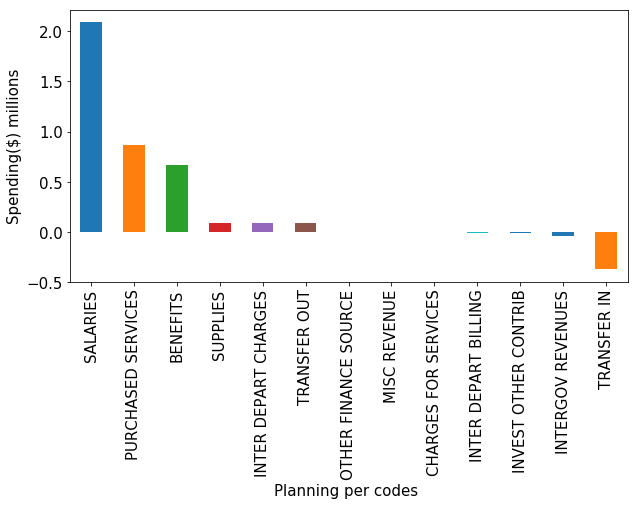

In [65]:
#MEAN bar plot for planning yearly budget by charactercodes 
agencyplot = planyearsum.mean().sort_values(ascending=False).T.plot.bar(figsize=(10,5))
agencyplot.set_ylabel("Spending($) millions")
agencyplot.set_xlabel("Planning per codes ")
print(agencyplot)

AxesSubplot(0.125,0.125;0.775x0.755)


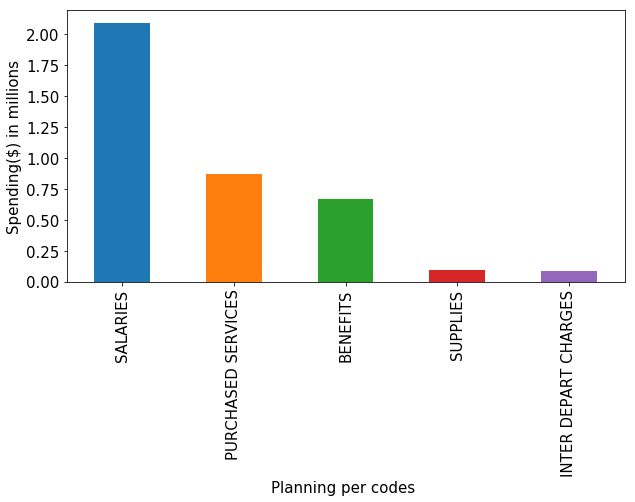

In [66]:
agencyplot = planyearsum.mean().sort_values(ascending=False).head().T.plot.bar(figsize=(10,5))
agencyplot.set_ylabel("Spending($) in millions")
agencyplot.set_xlabel("Planning per codes ")
print(agencyplot)


Text(0.5,0,'Planning per codes ')

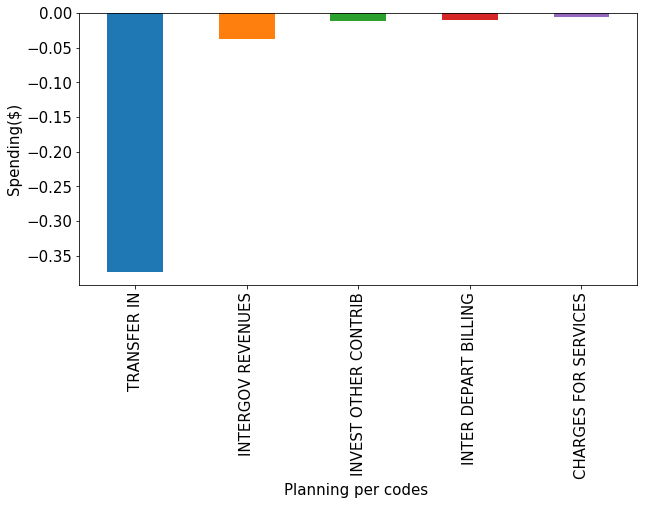

In [67]:
agencyplot = planyearsum.mean().sort_values(ascending=True).head().T.plot.bar(figsize=(10,5))
agencyplot.set_ylabel("Spending($)")
agencyplot.set_xlabel("Planning per codes ")

In [68]:
#salaries and purchased service in planning
plansalary = agency[agency["Character Code"]=="51 - SALARIES"]
planps = agency[agency["Character Code"]=="54 - PURCHASED SERVICES"]

#salaries and purchased service bar plot for planning yearly budget by charactercodes 
agencyplot = planyearsum.sort_values(ascending=False).head().T.plot.bar(figsize=(10,5))
agencyplot.set_ylabel("Spending($)")
agencyplot.set_xlabel("Planning per codes ")
print(agencyplot)


TypeError: sort_values() missing 1 required positional argument: 'by'

In [ ]:
#spending per services within planning


In [69]:
#dataframe of community development budget by character code
agencydic= {"2015": {}, "2016": {} , "2017": {} , "2018": {} }
for year in agencydic:
    for code in agency1["Character Code"]:
        if code not in agencydic[year]:
            a = agency1[agency1["Character Code"]==code]
            summ = a[year].sum()
            agencydic[year][code] = copy.deepcopy(summ)
adf = pd.DataFrame(agencydic["2015"], index=["2015"])
bdf = pd.DataFrame(agencydic["2016"], index=["2016"])
cdf = pd.DataFrame(agencydic["2017"], index=["2017"])
ddf = pd.DataFrame(agencydic["2018"], index=["2018"])
cdyearsum = pd.concat([adf, bdf, cdf, ddf])
cdyearsum

,PURCHASED SERVICES,SUPPLIES,SALARIES,BENEFITS,MISC REVENUE,INTERGOV REVENUES,INTER DEPART CHARGES,INVEST OTHER CONTRIB,CHARGES FOR SERVICES,OTHER FINANCE SOURCE,DEBT OTHR FINANCING,INTER DEPART BILLING,TRANSFER IN
2015,7361921.99,41473.96,1912783.89,631114.22,-74334.87,-3160.0,43853.00,-43453.30,-28244.79,0.0,0.00,-91643.0,0.0
2016,7450122.06,34235.37,1821139.23,742828.56,-75891.38,-1905.0,52969.17,-18605.00,-27965.73,0.0,26173.31,-39000.0,-6083.0
2017,10093124.30,41713.04,1842675.09,599180.41,-92422.58,-22500.0,78116.00,-66561.98,-29148.72,0.0,0.00,-45000.0,0.0
2018,8529147.25,42764.46,2073620.02,728018.39,-50967.95,-45000.0,76898.00,-19869.72,-26717.80,0.0,0.00,-90000.0,-14086.0


AxesSubplot(0.125,0.125;0.775x0.755)


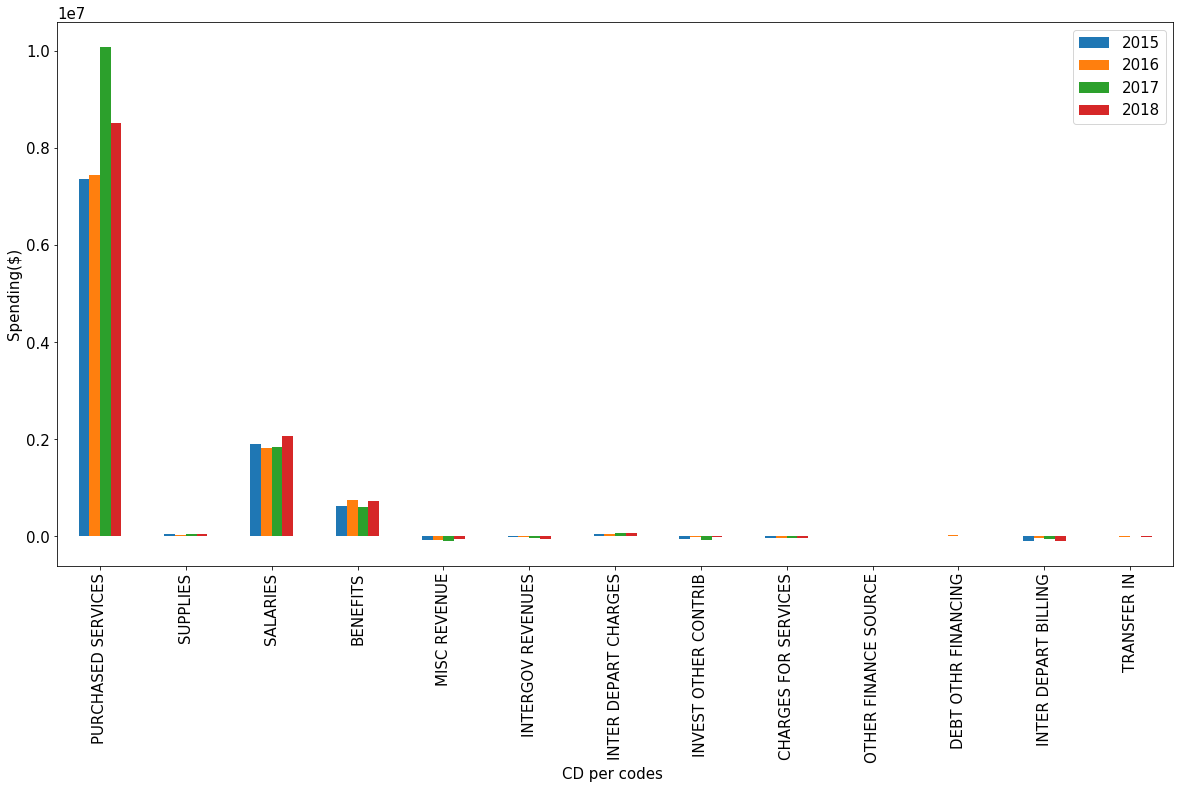

In [70]:
#bar graph of community development budget by character code
agency1plot = cdyearsum.T.plot.bar(figsize=(20,10))
agency1plot.set_ylabel("Spending($)")
agency1plot.set_xlabel("CD per codes ")
print(agency1plot)



In [71]:
#community development organizations
agencydic= {"2015": {}, "2016": {} , "2017": {} , "2018": {} }
for year in agencydic:
    for code in agency1["Organization"]:
        if code not in agencydic[year]:
            a = agency1[agency1["Organization"]==code]
            summ = a[year].sum()
            agencydic[year][code] = copy.deepcopy(summ)
adf = pd.DataFrame(agencydic["2015"], index=["2015"])
bdf = pd.DataFrame(agencydic["2016"], index=["2016"])
cdf = pd.DataFrame(agencydic["2017"], index=["2017"])
ddf = pd.DataFrame(agencydic["2018"], index=["2018"])
cdyearorg = pd.concat([adf, bdf, cdf, ddf])
cdyearorg.transpose()


,2015,2016,2017,2018
SENIOR CENTER FOUNDATION,-1.591616e-12,9923.47,-9923.47,9131.18
YOUTH SERVICES,8.034813e+05,869659.31,1095211.76,892303.81
SENIOR CENTER,5.394866e+05,560173.25,587969.11,588173.37
HOUSING SUPPLY GF,4.636951e+04,81651.07,192465.36,198614.33
CHILDREN AND FAMILIES,9.519819e+05,905872.10,982935.82,918869.39
AFFORDABLE HOUSING GENERAL GL,6.066758e+04,45817.14,42910.92,39410.69
COMMUNITY SUPPORT SVCS GENERAL,3.552920e+03,7075.44,1826.56,2909.56
ECON DEV EMPLOYMT OPPS GEN GF,2.757300e+02,0.00,0.00,0.00
CHILD CARE SERVICES,1.613626e+06,1688259.09,1703202.27,1567905.48
MEADOWOOD NEIGHBORHOOD CNTR,0.000000e+00,1223.00,83262.52,92637.55


In [72]:
#sum of all yearly spending by agencies in millions
sumdic= {"2015": {}, "2016": {} , "2017": {} , "2018": {} }
for year in sumdic:
    for agency in mfdf["Agency"]:
        if agency not in sumdic[year]:
            a = mfdf[mfdf["Agency"]==agency]
            summ = a[year].sum()
            sumdic[year][agency] = copy.deepcopy(summ)
edf = pd.DataFrame(sumdic["2015"], index=["2015"])
fdf = pd.DataFrame(sumdic["2016"], index=["2016"])
gdf = pd.DataFrame(sumdic["2017"], index=["2017"])
hdf = pd.DataFrame(sumdic["2018"], index=["2018"])
agencyyearsum = pd.concat([edf, fdf, gdf, hdf])
agencyyearsum = agencyyearsum/1000000


In [73]:
#sum of all spending by year/ verifying that numbers are correct
print(mfdf["2015"].sum())
summ= 0 
for agency in sumdic["2015"]:
    summ = sumdic["2015"][agency] + summ
summ

268663641.54999995


268663641.55

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


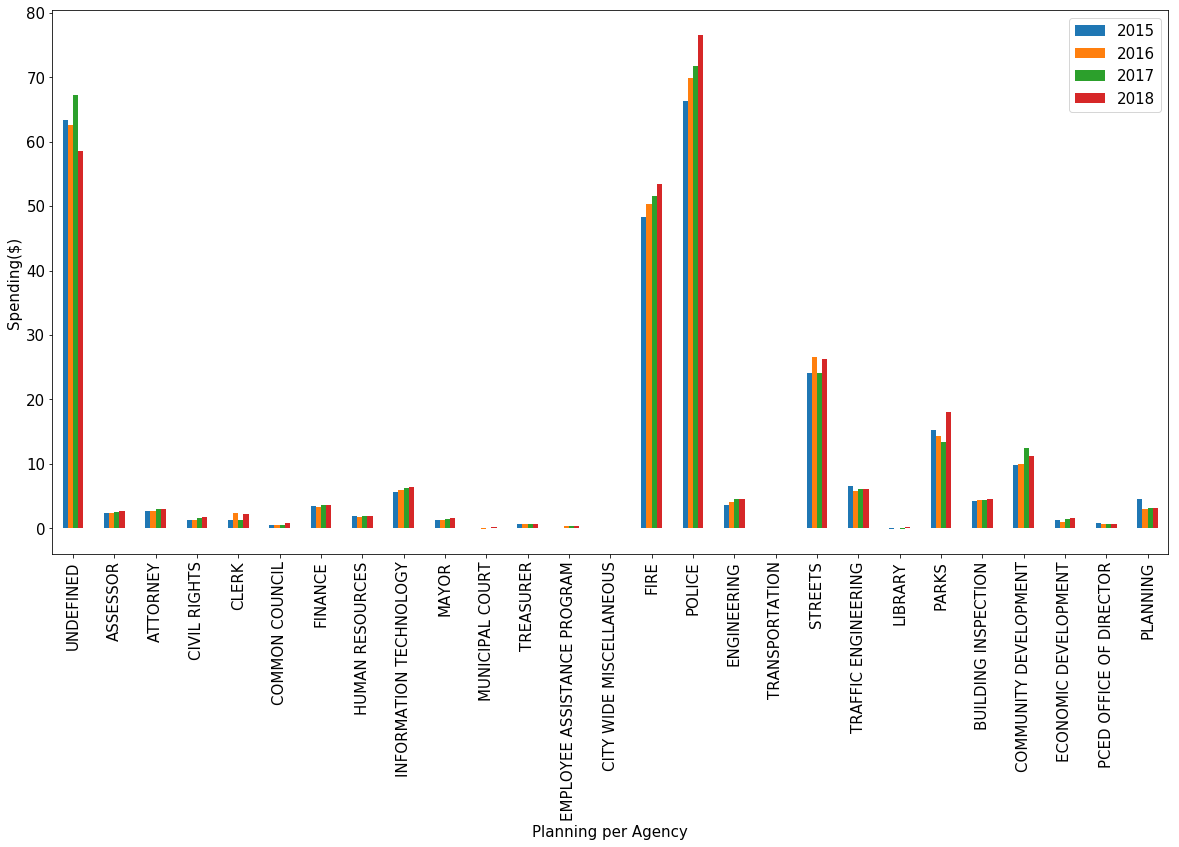

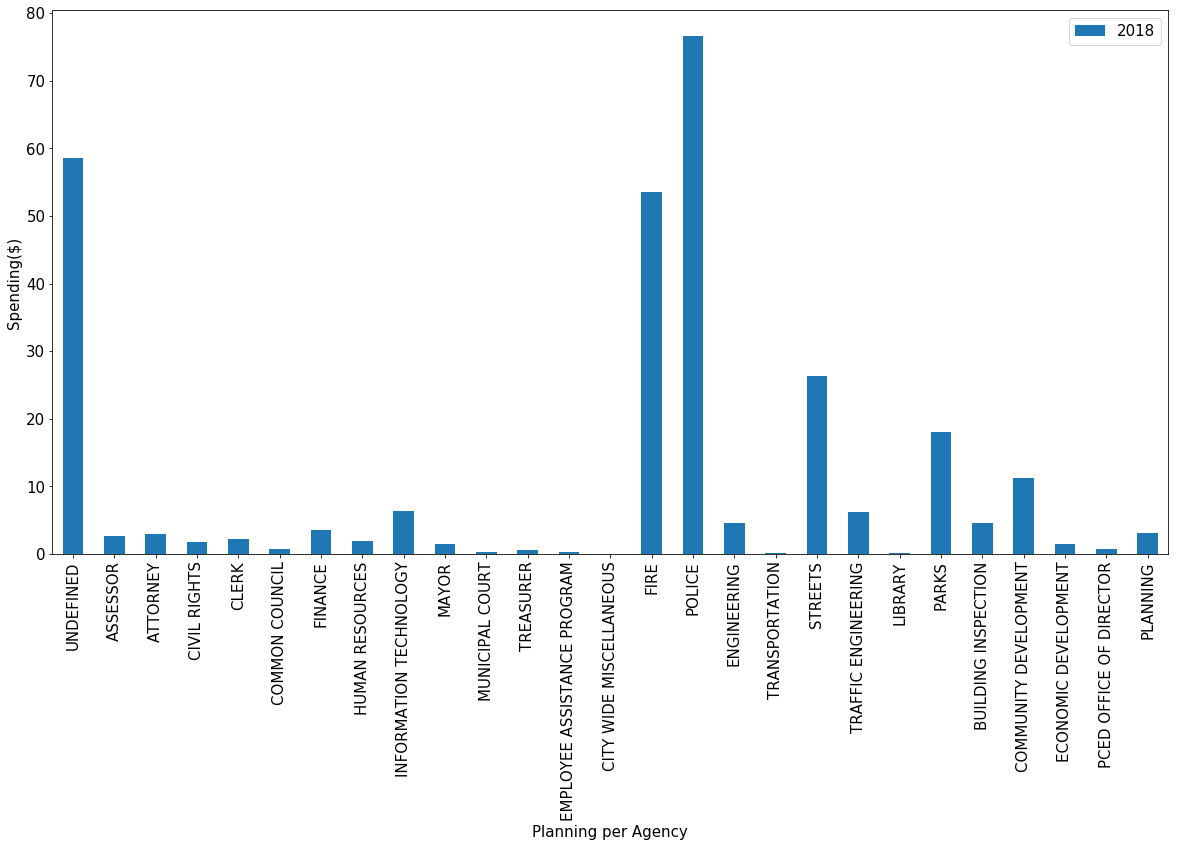

In [74]:
#bar plot for spending per year for all agencies
sumplot = agencyyearsum.T.plot.bar(figsize=(20,10))
sumplot.set_ylabel("Spending($)")
sumplot.set_xlabel("Planning per Agency")
print(sumplot)
#bar plot for spending per year for only planning
Sumplot = agencyyearsum['2018':].head(2).T.plot.bar(figsize=(20,10))
Sumplot.set_ylabel("Spending($)")
Sumplot.set_xlabel("Planning per Agency")
print(Sumplot)

Legend


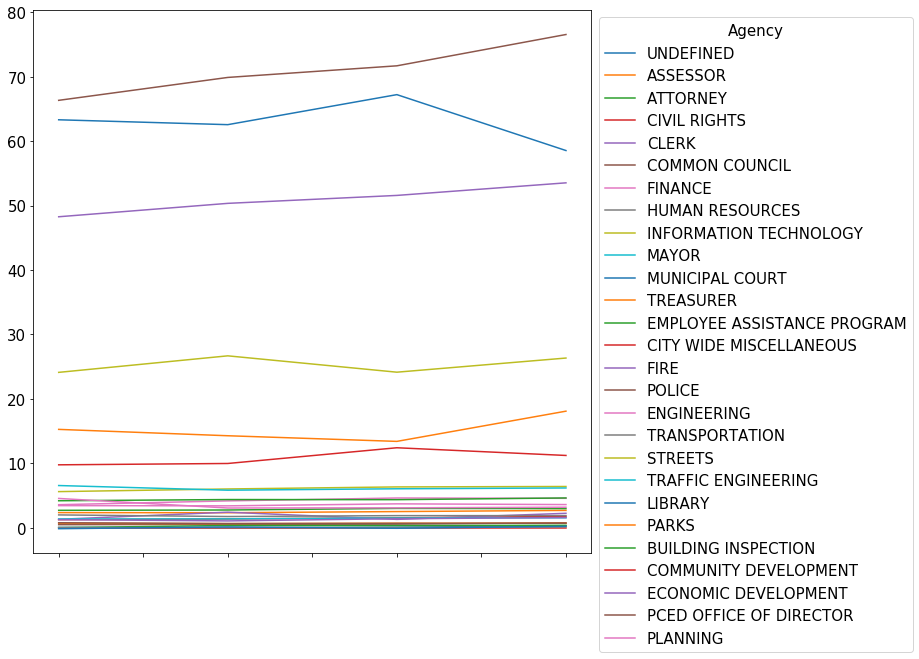

In [75]:
#line plot for spending per year for all agencies
lineplot = agencyyearsum.plot(figsize=(10,10)).legend(title='Agency', bbox_to_anchor=(1, 1))

print(lineplot)


In [76]:
#data frame of sum of all yearly spending by agencies in millions
df = pd.DataFrame(agencyyearsum.mean()/1000000)
df.columns = ['$ in Millions']
df

,$ in Millions
UNDEFINED,6.290797e-05
ASSESSOR,2.451293e-06
ATTORNEY,2.839390e-06
CIVIL RIGHTS,1.463377e-06
CLERK,1.797362e-06
COMMON COUNCIL,5.660058e-07
FINANCE,3.517155e-06
HUMAN RESOURCES,1.855460e-06
INFORMATION TECHNOLOGY,6.074480e-06
MAYOR,1.431571e-06


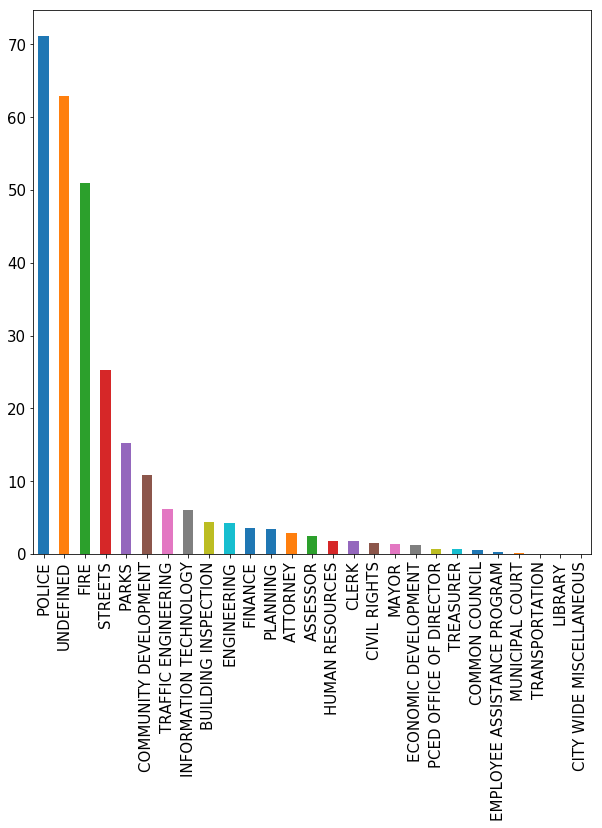

In [77]:
#bar plot of sum of all yearly spending by agencies in millions

meanplot = agencyyearsum.mean().sort_values(ascending=False).plot.bar(figsize=(10,10))
meanplot



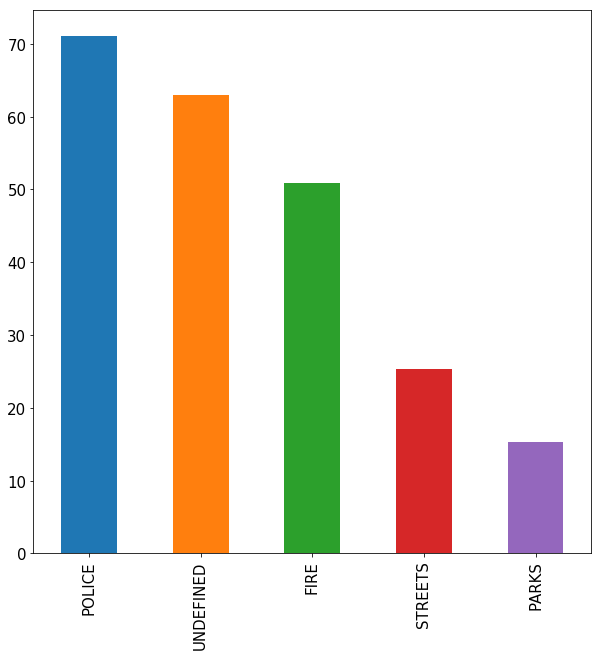

In [78]:
#only the top 5 of the bar plot of sum of all yearly spending by agencies in millions 
agencyyearsum.mean().sort_values(ascending=False).head().plot.bar(figsize=(10,10))

In [79]:
#creating new CSV file. do not re run
agency.to_csv('just_planning.csv')
madison_planning = pd.read_csv('just_planning.csv')
madison_planning = DataFrame(madison_planning)

AttributeError: 'str' object has no attribute 'to_csv'

In [ ]:
#sql graphs
import sqlite3
madison_planning = madison_planning.rename(columns = {"Unnamed: 0":"Index","Account Type": "Account_Type", "Character Code": "Character_Code"})
conn = sqlite3.connect('madison_planning.db')
madison_planning.to_sql("madison_planning_table", conn, if_exists = "replace", index = False)
pd.read_sql("select * from madison_planning_table", conn)

In [ ]:
data = "SELECT Organization, SUM([2015]) AS spending_per_org from madison_planning_table GROUP By Organization order BY Organization"
pd.read_sql(data, conn) 